In [1]:
# import sys
# sys.path.append('../')

# from qiskit_utilities.mixers import *
from mixers import *

In [2]:
from IPython.display import display
np.set_printoptions(suppress=True)

In [3]:
import matplotlib.pyplot as pl
import tikzplotlib

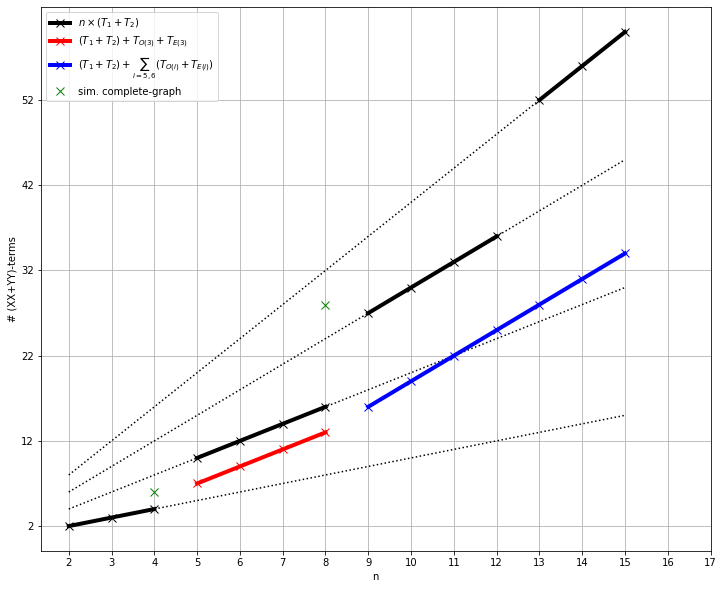

In [4]:
import numpy as np
y={}
ma=16
y[1]=np.zeros(ma)
y[11]=np.zeros(ma)
y[111]=np.zeros(ma)
y[1111]=np.zeros(ma)
y[13]=np.zeros(ma)
y[14]=np.zeros(ma)
y[135]=np.zeros(ma)
y[156]=np.zeros(ma)
y[147]=np.zeros(ma)

ns=range(2,2+ma)
for n in ns:
#     x=[]
    y[1][n-2]=n
    y[11][n-2]=2*n
    y[111][n-2]=3*n
    y[1111][n-2]=4*n
    if n>4:
        y[13][n-2]=n+(n-3)
    if n>5:
        y[14][n-2]=n+(n-4)
    if n>6:
        y[135][n-2]=n+(n-3)+(n-5)
    if n>7:
        y[156][n-2]=n+(n-5)+(n-6)
    if n>8:
        y[147][n-2]=n+(n-4)+(n-7)
#     for d in [1,3,4,5,6,7]:
#         x.append(n-d)
#     print(n,x)


pl.figure(figsize=(12,10))
#1 time
pl.plot(range(2,ma),range(2,ma),'k:')
pl.plot(range(2,5),range(2,5),'xk-',linewidth=4,markersize=8)
#2 times
pl.plot(range(2,ma),2*np.arange(2,ma),'k:')
pl.plot(range(5,9),2*np.arange(5,9),'xk-',linewidth=4,markersize=8)
# pl.plot(range(8,ma),2*np.arange(8,ma),'xk:')
#3 times
pl.plot(range(2,ma),3*np.arange(2,ma),'k:')
pl.plot(range(9,13),3*np.arange(9,13),'xk-',linewidth=4,markersize=8)
# pl.plot(range(12,ma),3*np.arange(12,ma),'xk:')
#4 times
pl.plot(range(2,ma),4*np.arange(2,ma),'k:')
pl.plot(range(13,ma),4*np.arange(13,ma),'xk-',label=r'$n\times(T_1+T_2)$',linewidth=4,markersize=8)

#+3
tmp=np.arange(5,9)
pl.plot(tmp,2*tmp-3,'rx-',label=r'$(T_1+T_2)+T_{O(3)}+T_{E(3)}$',linewidth=4,markersize=8)
tmp=np.arange(8,ma)
# pl.plot(tmp,2*tmp-3,'rx:')

#+5+6
tmp=np.arange(9,ma)
pl.plot(tmp,3*tmp-11,'bx-',label=r'$(T_1+T_2)+\sum_{i=5,6}(T_{O(i)}+T_{E(i)})$',linewidth=4,markersize=8)
tmp=np.arange(8,ma)
# pl.plot(tmp,2*tmp-3,'rx:')

pl.plot([4,8],[6,28],'gx',label='sim. complete-graph',linewidth=4,markersize=8)

# pl.plot(range(12,ma),3*np.arange(12,ma),'xk:')
# for items in y:
#     print(items, y[items])
#     if items==1 or items==11 or items==111 or items==1111:
#         pl.plot(ns,y[items],'-kx',label=str(items))
#     else:
#         pl.plot(ns,y[items],label=str(items))
# # print(y)
pl.legend(loc=2)
pl.grid()
_=pl.xticks(ns)
_=pl.yticks(range(2,60,10))
pl.xlabel("n")
pl.ylabel("# (XX+YY)-terms")
# pl.title("all have linear depth, number of XX+YY terms, so cost is 4 times as much")
tikzplotlib.save("onehot_Trotterizations.tex")


--------
5


array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.]])


--------
6


array([[0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0.]])


--------
7


array([[0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0.]])


--------
8


array([[0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0.]])


--------
9


array([[0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
10


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
11


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
12


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
13


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
14


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])


--------
15


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.

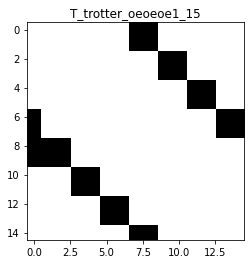

In [5]:
pl.figure()
for n in range(5,16):
    print()
    print("--------")
    print(n)

    yesno={}
    yesno["oe1"]=np.zeros((n, n), dtype=bool)
    yesno["oeoe1"]=np.zeros((n, n), dtype=bool)
    yesno["oeoeoe1"]=np.zeros((n, n), dtype=bool)
#     yesno["oeoeoeoe1"]=np.zeros((n, n), dtype=bool)

    T_tmp={}
    for oe in ["odd", "even"]:
        T_tmp[oe+str(1)]=get_T(n,mode="nearest_int_cyclic",oddeven=oe)
    
    T=np.zeros((n,n))
    for oe in ["odd", "even"]:
        T+=T_tmp[oe+str(1)]
    display(T)
    
    if True:
    
        for p1 in range(n+1):
            for p2 in range(n+1):
                T12=np.matmul(np.linalg.matrix_power(T_tmp["odd1"],p1),np.linalg.matrix_power(T_tmp["even1"],p2))
                yesno["oe1"]=yesno["oe1"] | (T12>0)
                for p3 in range(n+1):
                    for p4 in range(n+1):
                        T1234=np.matmul(T12,np.linalg.matrix_power(T_tmp["odd1"],p3))
                        T1234=np.matmul(T1234,np.linalg.matrix_power(T_tmp["even1"],p4))
                        yesno["oeoe1"]=yesno["oeoe1"] | (T1234>0)
                        for p5 in range(n+1):
                            for p6 in range(n+1):
                                T123456=np.matmul(T1234,np.linalg.matrix_power(T_tmp["odd1"],p5))
                                T123456=np.matmul(T123456,np.linalg.matrix_power(T_tmp["even1"],p6))
                                yesno["oeoeoe1"]=yesno["oeoeoe1"] | (T123456>0)
    #                             for p7 in range(n+1):
    #                                 for p8 in range(n+1):
    #                                     T12345678=np.matmul(T123456,np.linalg.matrix_power(T_tmp["odd1"],p5))
    #                                     T12345687=np.matmul(T12345678,np.linalg.matrix_power(T_tmp["even1"],p6))
    #                                     yesno["oeoeoeoe1"]=yesno["oeoeoeoe1"] | (T12345678>0)

        pl.clf()
        pl.title("T_trotter_oe1_"+str(n))
        pl.imshow(yesno["oe1"], cmap=pl.cm.gray,vmin=0,vmax=1)
        pl.savefig("T_trotter_eo1_"+str(n)+".png")

        pl.clf()
        pl.title("T_trotter_oeoe1_"+str(n))
        pl.imshow(yesno["oeoe1"], cmap=pl.cm.gray,vmin=0,vmax=1)
        pl.savefig("T_trotter_oeoe1_"+str(n)+".png")

        pl.clf()
        pl.title("T_trotter_oeoeoe1_"+str(n))
        pl.imshow(yesno["oeoeoe1"], cmap=pl.cm.gray,vmin=0,vmax=1)
        pl.savefig("T_trotter_oeoeoe1_"+str(n)+".png")

    #     pl.clf()
    #     pl.title("T_trotter_oeoeoeoe1_"+str(n))
    #     pl.imshow(yesno["oeoeoeoe1"], cmap=pl.cm.gray,vmin=0,vmax=1)
    #     pl.savefig("T_trotter_oeoeoeoe1_"+str(n)+".png")

In [6]:
T=get_T(5,mode="nearest_int_cyclic")
T=get_T(5,mode="nearest_int",shift=3)
# T=get_T(5,mode="leftright",i=0,j=3)
# T=get_T(5,mode="leftright",i=1,j=4)
T

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [7]:
pl.figure()

for idonotmatter in range(3):
    if idonotmatter==0:
        shifts=[3,5]
    elif idonotmatter==1:
        shifts=[3,6]
    elif idonotmatter==2:
        shifts=[4,6]

    for n in range(5,16):
        print()
        print("--------")
        print(n)


        yesno={}
        yesno["oe1"+str(shifts[0])]=np.zeros((n, n), dtype=bool)
        yesno["oe1"+str(shifts[0])+str(shifts[1])]=np.zeros((n, n), dtype=bool)

        T_tmp={}
        for oe in ["odd", "even"]:
            T_tmp[oe+str(1)]=get_T(n,mode="nearest_int_cyclic",oddeven=oe)
        for s in shifts:
            for oe in ["odd", "even"]:
                T_tmp[oe+str(s)]=get_T(n,mode="nearest_int",shift=s,oddeven=oe)

        T=np.zeros((n,n))
        for oe in ["odd", "even"]:
            T+=T_tmp[oe+str(1)]
        for s in shifts:
            for oe in ["odd", "even"]:
                T+=T_tmp[oe+str(s)]
        display(shifts,T)

        if False:
            for p1 in range(n+1):
                for p2 in range(n+1):
                    T12=np.matmul(np.linalg.matrix_power(T_tmp["odd1"],p1),np.linalg.matrix_power(T_tmp["even1"],p2))
                    for p3 in range(n+1):
                        for p4 in range(n+1):
                            T1234=np.matmul(T12,np.linalg.matrix_power(T_tmp["odd"+str(shifts[0])],p3))
                            T1234=np.matmul(T1234,np.linalg.matrix_power(T_tmp["even"+str(shifts[0])],p4))
                            yesno["oe1"+str(shifts[0])]=yesno["oe1"+str(shifts[0])] | (T1234>0)
                            for p5 in range(n+1):
                                for p6 in range(n+1):
                                    T123456=np.matmul(T1234,np.linalg.matrix_power(T_tmp["odd"+str(shifts[1])],p5))
                                    T123456=np.matmul(T123456,np.linalg.matrix_power(T_tmp["even"+str(shifts[1])],p6))
                                    yesno["oe1"+str(shifts[0])+str(shifts[1])]=yesno["oe1"+str(shifts[0])+str(shifts[1])] | (T123456>0)

            pl.clf()
            pl.title("T_trotter_eo1"+str(shifts[0])+"_"+str(n))
            pl.imshow(yesno["oe1"+str(shifts[0])], cmap=pl.cm.gray,vmin=0,vmax=1)
            pl.savefig("T_trotter_eo1"+str(shifts[0])+"_"+str(n)+".png")

            pl.clf()
            pl.title("T_trotter_eo1"+str(shifts[0])+str(shifts[1])+"_"+str(n))
            pl.imshow(yesno["oe1"+str(shifts[0])+str(shifts[1])], cmap=pl.cm.gray,vmin=0,vmax=1)
            pl.savefig("T_trotter_eo1"+str(shifts[0])+str(shifts[1])+"_"+str(n)+".png")


--------
5


[3, 5]

array([[0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0.]])


--------
6


[3, 5]

array([[0., 1., 0., 1., 0., 2.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [2., 0., 1., 0., 1., 0.]])


--------
7


[3, 5]

array([[0., 1., 0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 0.]])


--------
8


[3, 5]

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])


--------
9


[3, 5]

array([[0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0.]])


--------
10


[3, 5]

array([[0., 1., 0., 1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.]])


--------
11


[3, 5]

array([[0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.]])


--------
12


[3, 5]

array([[0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.]])


--------
13


[3, 5]

array([[0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.]])


--------
14


[3, 5]

array([[0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.]])


--------
15


[3, 5]

array([[0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.


--------
5


[3, 6]

array([[0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0.]])


--------
6


[3, 6]

array([[0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.]])


--------
7


[3, 6]

array([[0., 1., 0., 1., 0., 0., 2.],
       [1., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1.],
       [2., 0., 0., 1., 0., 1., 0.]])


--------
8


[3, 6]

array([[0., 1., 0., 1., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 1., 0., 0., 1., 0., 1., 0.]])


--------
9


[3, 6]

array([[0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0.]])


--------
10


[3, 6]

array([[0., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 1., 0.]])


--------
11


[3, 6]

array([[0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.]])


--------
12


[3, 6]

array([[0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.]])


--------
13


[3, 6]

array([[0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.]])


--------
14


[3, 6]

array([[0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.]])


--------
15


[3, 6]

array([[0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.


--------
5


[4, 6]

array([[0., 1., 0., 0., 2.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [2., 0., 0., 1., 0.]])


--------
6


[4, 6]

array([[0., 1., 0., 0., 1., 1.],
       [1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1.],
       [1., 1., 0., 0., 1., 0.]])


--------
7


[4, 6]

array([[0., 1., 0., 0., 1., 0., 2.],
       [1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1.],
       [2., 0., 1., 0., 0., 1., 0.]])


--------
8


[4, 6]

array([[0., 1., 0., 0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 0., 1., 0.]])


--------
9


[4, 6]

array([[0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0.]])


--------
10


[4, 6]

array([[0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0.]])


--------
11


[4, 6]

array([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.]])


--------
12


[4, 6]

array([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.]])


--------
13


[4, 6]

array([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.]])


--------
14


[4, 6]

array([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.]])


--------
15


[4, 6]

array([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.

<Figure size 432x288 with 0 Axes>

In [8]:
pl.figure()

for idonotmatter in range(3):
    if idonotmatter==0:
        shifts=[3,5]
    elif idonotmatter==1:
        shifts=[3,6]
    elif idonotmatter==2:
        shifts=[4,6]

    for n in range(2,5):
        print()
        print("--------")
        print(n)


        yesno={}
        yesno["oe1"+str(shifts[0])]=np.zeros((n, n), dtype=bool)
        yesno["oe1"+str(shifts[0])+str(shifts[1])]=np.zeros((n, n), dtype=bool)

        T_tmp={}
        for oe in ["odd", "even"]:
            T_tmp[oe+str(1)]=get_T(n,mode="nearest_int_cyclic",oddeven=oe)
        for s in shifts:
            for oe in ["odd", "even"]:
                T_tmp[oe+str(s)]=get_T(n,mode="nearest_int",shift=s,oddeven=oe)

        T=np.zeros((n,n))
        for oe in ["odd", "even"]:
            T+=T_tmp[oe+str(1)]
        for s in shifts:
            for oe in ["odd", "even"]:
                T+=T_tmp[oe+str(s)]
        display(shifts,T)

        if False:
            for p1 in range(n+1):
                for p2 in range(n+1):
                    T12=np.matmul(np.linalg.matrix_power(T_tmp["odd1"],p1),np.linalg.matrix_power(T_tmp["even1"],p2))
                    for p3 in range(n+1):
                        for p4 in range(n+1):
                            T1234=np.matmul(T12,np.linalg.matrix_power(T_tmp["odd"+str(shifts[0])],p3))
                            T1234=np.matmul(T1234,np.linalg.matrix_power(T_tmp["even"+str(shifts[0])],p4))
                            yesno["oe1"+str(shifts[0])]=yesno["oe1"+str(shifts[0])] | (T1234>0)
                            for p5 in range(n+1):
                                for p6 in range(n+1):
                                    T123456=np.matmul(T1234,np.linalg.matrix_power(T_tmp["odd"+str(shifts[1])],p5))
                                    T123456=np.matmul(T123456,np.linalg.matrix_power(T_tmp["even"+str(shifts[1])],p6))
                                    yesno["oe1"+str(shifts[0])+str(shifts[1])]=yesno["oe1"+str(shifts[0])+str(shifts[1])] | (T123456>0)

            pl.clf()
            pl.title("T_trotter_eo1"+str(shifts[0])+"_"+str(n))
            pl.imshow(yesno["oe1"+str(shifts[0])], cmap=pl.cm.gray,vmin=0,vmax=1)
            pl.savefig("T_trotter_eo1"+str(shifts[0])+"_"+str(n)+".png")

            pl.clf()
            pl.title("T_trotter_eo1"+str(shifts[0])+str(shifts[1])+"_"+str(n))
            pl.imshow(yesno["oe1"+str(shifts[0])+str(shifts[1])], cmap=pl.cm.gray,vmin=0,vmax=1)
            pl.savefig("T_trotter_eo1"+str(shifts[0])+str(shifts[1])+"_"+str(n)+".png")


--------
2


[3, 5]

array([[0., 1.],
       [1., 0.]])


--------
3


[3, 5]

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])


--------
4


[3, 5]

array([[0., 1., 0., 2.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [2., 0., 1., 0.]])


--------
2


[3, 6]

array([[0., 1.],
       [1., 0.]])


--------
3


[3, 6]

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])


--------
4


[3, 6]

array([[0., 1., 0., 2.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [2., 0., 1., 0.]])


--------
2


[4, 6]

array([[0., 1.],
       [1., 0.]])


--------
3


[4, 6]

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])


--------
4


[4, 6]

array([[0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.]])

<Figure size 432x288 with 0 Axes>

In [9]:
for n in range(3,15):
    T=np.zeros((n,n))
    for oe in ["odd", "even"]:
        T+=get_T(n,mode="nearest_int_cyclic",oddeven=oe)
    for s in range(3,n-1,2):
        print(s)
        for oe in ["odd", "even"]:
            T+=get_T(n,mode="nearest_int",shift=s,oddeven=oe)
    print(T)

[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]
[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
3
[[0. 1. 0. 1. 1.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0.]]
3
[[0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0.]]
3
5
[[0. 1. 0. 1. 0. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0.]]
3
5
[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]
3
5
7
[[0. 1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1. 0.]]
3
5
7
[[0

In [10]:
    n=5
    shift=3
    print()
    print("--------")
    print(n)
    
    ind={}
    ind["even"]={}
    ind["odd"]={}

    for a in [0,shift+1]:#,2*shift+1]:
        ind["even"][a]={}
        ind["even"][a]["i"]=[]
        ind["even"][a]["j"]=[]
        ind["odd"][a]={}
        ind["odd"][a]["i"]=[]
        ind["odd"][a]["j"]=[]
        for i in range(a+0,a+n,2):
            if i>=n:
                break
            if a>0:
                j=(i-a)%n
            else:
                j=(i+1)%n
            ind["even"][a]["i"].append(i)
            ind["even"][a]["j"].append(j)
        for i in range(a+1,a+n,2):
            if i>=n:
                break
            if a>0:
                j=(i-a)%n
            else:
                j=(i+1)%n
            ind["odd"][a]["i"].append(i)
            ind["odd"][a]["j"].append(j)

    print(ind)
    
    T_f=np.zeros((n,n))
    T_eo={}
    T_eo["even"]={}
    T_eo["odd"]={}
    for a in [0,shift+1]:#,2*shift+1]:
        T_eo["even"][a]=get_T(mode="leftright",n=n,i=ind["even"][a]["i"],j=ind["even"][a]["j"])
        T_eo["odd"][a]=get_T(mode="leftright",n=n,i=ind["odd"][a]["i"],j=ind["odd"][a]["j"])
        T_f+=T_eo["even"][a]+T_eo["odd"][a]
#     display(T_eo)
    display(T_f)
    
    yesno1=np.zeros((n, n), dtype=bool)
    yesno2=np.zeros((n, n), dtype=bool)
    yesno3=np.zeros((n, n), dtype=bool)

    for p1 in range(n+1):
        for p2 in range(n+1):
            a=0
            T1=np.matmul(np.linalg.matrix_power(T_eo["even"][a],p1),np.linalg.matrix_power(T_eo["odd"][a],p2))
            yesno1=yesno1 | (T1>0)
    
    for p1 in range(n+1):
        for p2 in range(n+1):
            for p3 in range(n+1):
                for p4 in range(n+1):
                    a=0
                    T1=np.matmul(np.linalg.matrix_power(T_eo["even"][a],p1),np.linalg.matrix_power(T_eo["odd"][a],p2))
                    a=shift+1
                    T1=np.matmul(T1,np.linalg.matrix_power(T_eo["even"][a],p3))
                    T1=np.matmul(T1,np.linalg.matrix_power(T_eo["odd"][a],p4))
                    yesno2=yesno2 | (T1>0)
    
    for p1 in range(n+1):
        for p2 in range(n+1):
            for p3 in range(n+1):
                for p4 in range(n+1):
                    a=0
                    T1=np.matmul(np.linalg.matrix_power(T_eo["even"][a],p1),np.linalg.matrix_power(T_eo["odd"][a],p2))
                    T1=np.matmul(T1,np.linalg.matrix_power(T_eo["even"][a],p3))
                    T1=np.matmul(T1,np.linalg.matrix_power(T_eo["odd"][a],p4))
                    yesno3=yesno3 | (T1>0)
    
#     for p1 in range(n+1):
#         for p2 in range(n+1):
#             for p3 in range(n+1):
#                 for p4 in range(n+1):
#                     for p5 in range(n+1):
#                         for p6 in range(n+1):
#                             a=0
#                             T1=np.matmul(np.linalg.matrix_power(T_eo["even"][a],p1),np.linalg.matrix_power(T_eo["odd"][a],p2))
#                             a=shift+1
#                             T1=np.matmul(T1,np.linalg.matrix_power(T_eo["even"][a],p3))
#                             T1=np.matmul(T1,np.linalg.matrix_power(T_eo["odd"][a],p4))
#                             a=2*shift+1
#                             T1=np.matmul(T1,np.linalg.matrix_power(T_eo["even"][a],p5))
#                             T1=np.matmul(T1,np.linalg.matrix_power(T_eo["odd"][a],p6))
#                             yesno3=yesno3 | (T1>0)
    

    print(" even, odd")
    print(yesno1)
    print(" even, odd, even, odd")
    print(yesno3)
    print(" shift")
    print(yesno2)


--------
5
{'even': {0: {'i': [0, 2, 4], 'j': [1, 3, 0]}, 4: {'i': [4], 'j': [0]}}, 'odd': {0: {'i': [1, 3], 'j': [2, 4]}, 4: {'i': [], 'j': []}}}


array([[0., 1., 0., 0., 2.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [2., 0., 0., 1., 0.]])

 even, odd
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
 even, odd, even, odd
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
 shift
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


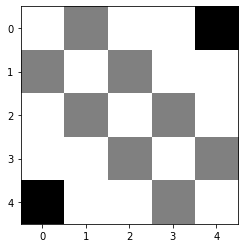

In [11]:
pl.figure()
pl.imshow(1-T_f, cmap=pl.cm.gray)

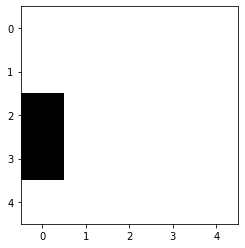

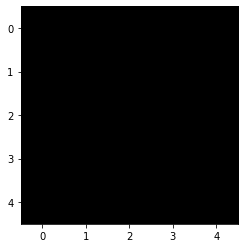

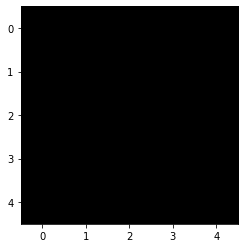

In [12]:
pl.figure()
pl.imshow(yesno1, cmap=pl.cm.gray)
pl.figure()
pl.imshow(yesno2, cmap=pl.cm.gray)
pl.figure()
pl.imshow(yesno3, cmap=pl.cm.gray)

In [13]:
tmp=['100','010','001']
tmp_neg=get_bitwise_negated_strings(tmp)
tmp, tmp_neg, get_overlap(tmp,tmp_neg), get_minus(tmp_neg,tmp)

(['100', '010', '001'],
 ['011', '101', '110'],
 [],
 (['011', '101', '110'], [0, 1, 2]))

In [14]:
tmp=['001','111','101']
tmp_neg=get_bitwise_negated_strings(tmp)
tmp, tmp_neg, get_overlap(tmp,tmp_neg), get_minus(tmp_neg,tmp)

(['001', '111', '101'],
 ['110', '000', '010'],
 [],
 (['110', '000', '010'], [0, 1, 2]))

In [15]:
tmp=['100','010','011']
tmp_neg=get_bitwise_negated_strings(tmp)
tmp, tmp_neg, get_overlap(tmp,tmp_neg), get_minus(tmp_neg,tmp)

(['100', '010', '011'], ['011', '101', '100'], ['100', '011'], (['101'], [1]))

In [16]:
tmp=['100','010','001','011']
tmp_neg=get_bitwise_negated_strings(tmp)
minus, m_ind = get_minus(tmp_neg,tmp)
tmp, tmp_neg, get_overlap(tmp,tmp_neg), minus, m_ind

(['100', '010', '001', '011'],
 ['011', '101', '110', '100'],
 ['100', '011'],
 ['101', '110'],
 [1, 2])

In [17]:
get_overlap(['1000','0100','0010','0001'],
           ['0101','1001','0110','1010','0111','1011','1100','0000','1111','0011','1101','0001','1110','0010']
           )

['0010', '0001']

In [18]:
H_12=get_H(['100','010','001'],get_T(3,"leftright",i=0,j=2),simplify=False)
H_12=simplifyH(H_12)
display(H_12)

0.25*sigma1x1xsigma1 + 0.25*sigma1xsigma3xsigma1 + 0.25*sigma2x1xsigma2 + 0.25*sigma2xsigma3xsigma2

In [19]:
H_12=get_H(['11','00'],get_T(2,"nearest_int"),simplify=False)
H_12=simplifyH(H_12)
display(H_12)

0.5*sigma1xsigma1 - 0.5*sigma2xsigma2

In [20]:
H_12=get_H(['1100','0000'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['1111','0011'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['1101','0001'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['1110','0010'],get_T(2,"nearest_int"),simplify=False)
H_12=simplifyH(H_12)
display(H_12)

0.5*sigma1xsigma1x1x1 - 0.5*sigma2xsigma2x1x1

In [21]:
H_12=get_H(['0100','1000'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['0101','1001'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['0110','1010'],get_T(2,"nearest_int"),simplify=False)
H_12+=get_H(['0111','1011'],get_T(2,"nearest_int"),simplify=False)

H_12=simplifyH(H_12)
display(H_12)

0.5*sigma1xsigma1x1x1 + 0.5*sigma2xsigma2x1x1

In [22]:
H=get_H(['0100','1000','0010','0001'],get_T(4,"nearest_int"),simplify=False)

H+=get_H(['0101','1001'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['0110','1010'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['0111','1011'],get_T(2,"nearest_int"),simplify=False)

H+=get_H(['1001','0011'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['1100','0110'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['1101','0111'],get_T(2,"nearest_int"),simplify=False)

H+=get_H(['0110','0101'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['1010','1001'],get_T(2,"nearest_int"),simplify=False)
H+=get_H(['1110','1101'],get_T(2,"nearest_int"),simplify=False)

H=simplifyH(H)
display(H)

0.5*1x1xsigma1xsigma1 + 0.5*1x1xsigma2xsigma2 + 0.5*sigma1x1xsigma1x1 + 0.5*sigma1xsigma1x1x1 + 0.5*sigma2x1xsigma2x1 + 0.5*sigma2xsigma2x1x1

In [23]:
all_states(3)

['000', '001', '010', '011', '100', '101', '110', '111']

In [24]:
a = symbols('a')
b = symbols('b')
c = symbols('c')
T=Matrix(([a,b],[b,c]))
display(T)

get_H(['01','10'],T,symbolic=True)
# print_info2(['01','10'],T)

Matrix([
[a, b],
[b, c]])

0.25*a*1x1 - 0.25*a*1xsigma3 + 0.25*a*sigma3x1 - 0.25*a*sigma3xsigma3 + 0.5*b*sigma1xsigma1 + 0.5*b*sigma2xsigma2 + 0.25*c*1x1 + 0.25*c*1xsigma3 - 0.25*c*sigma3x1 - 0.25*c*sigma3xsigma3

In [25]:
T=np.ones((2,2))-np.identity(2)
display(T)

print_info(['01','10'],T)

array([[0., 1.],
       [1., 0.]])

Hamming distance= (2, 0.2)


'H='

0.5*sigma1xsigma1 + 0.5*sigma2xsigma2

#sqg, #cnots= (0, 4)
overlap with bitwise negated stringlist = ['01', '10']
minus = []
g(x)= 2*x0*x1 - x0 - x1 + 1
is zero for the following bitstrings:
0 1
1 0


In [26]:
T=np.ones((3,3))-2*np.identity(3)
display(T)

print_info(['100','010','001'],T)

T=np.ones((3,3))-np.identity(3)
display(T)

print_info(['100','010','001'],T)

T=np.ones((3,3))-np.identity(3)
T[0,2]=0
T[2,0]=0
display(T)

print_info(['100','010','001'],T)

array([[-1.,  1.,  1.],
       [ 1., -1.,  1.],
       [ 1.,  1., -1.]])

Hamming distance= (8, 4.4)


'H='

-0.375*1x1x1 - 0.125*1x1xsigma3 + 0.25*1xsigma1xsigma1 + 0.25*1xsigma2xsigma2 - 0.125*1xsigma3x1 + 0.125*1xsigma3xsigma3 + 0.25*sigma1x1xsigma1 + 0.25*sigma1xsigma1x1 + 0.25*sigma1xsigma1xsigma3 + 0.25*sigma1xsigma3xsigma1 + 0.25*sigma2x1xsigma2 + 0.25*sigma2xsigma2x1 + 0.25*sigma2xsigma2xsigma3 + 0.25*sigma2xsigma3xsigma2 - 0.125*sigma3x1x1 + 0.125*sigma3x1xsigma3 + 0.25*sigma3xsigma1xsigma1 + 0.25*sigma3xsigma2xsigma2 + 0.125*sigma3xsigma3x1 + 0.375*sigma3xsigma3xsigma3

#sqg, #cnots= (3, 46)


'H+H_neg='

-0.75*1x1x1 + 0.5*1xsigma1xsigma1 + 0.5*1xsigma2xsigma2 + 0.25*1xsigma3xsigma3 + 0.5*sigma1x1xsigma1 + 0.5*sigma1xsigma1x1 + 0.5*sigma2x1xsigma2 + 0.5*sigma2xsigma2x1 + 0.25*sigma3x1xsigma3 + 0.25*sigma3xsigma3x1

#sqg, #cnots= (0, 18)


'H+H_minus='

-0.75*1x1x1 + 0.5*1xsigma1xsigma1 + 0.5*1xsigma2xsigma2 + 0.25*1xsigma3xsigma3 + 0.5*sigma1x1xsigma1 + 0.5*sigma1xsigma1x1 + 0.5*sigma2x1xsigma2 + 0.5*sigma2xsigma2x1 + 0.25*sigma3x1xsigma3 + 0.25*sigma3xsigma3x1

#sqg, #cnots= (0, 18)
g(x)= -2*x0*x1*x2 + 4*x0*x1 + 4*x0*x2 - x0 + 4*x1*x2 - x1 - x2 + 1
is zero for the following bitstrings:
0 0 1
0 1 0
1 0 0


array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

Hamming distance= (8, 4.4)


'H='

0.25*1xsigma1xsigma1 + 0.25*1xsigma2xsigma2 + 0.25*sigma1x1xsigma1 + 0.25*sigma1xsigma1x1 + 0.25*sigma1xsigma1xsigma3 + 0.25*sigma1xsigma3xsigma1 + 0.25*sigma2x1xsigma2 + 0.25*sigma2xsigma2x1 + 0.25*sigma2xsigma2xsigma3 + 0.25*sigma2xsigma3xsigma2 + 0.25*sigma3xsigma1xsigma1 + 0.25*sigma3xsigma2xsigma2

#sqg, #cnots= (0, 36)


'H+H_neg='

0.5*1xsigma1xsigma1 + 0.5*1xsigma2xsigma2 + 0.5*sigma1x1xsigma1 + 0.5*sigma1xsigma1x1 + 0.5*sigma2x1xsigma2 + 0.5*sigma2xsigma2x1

#sqg, #cnots= (0, 12)


'H+H_minus='

0.5*1xsigma1xsigma1 + 0.5*1xsigma2xsigma2 + 0.5*sigma1x1xsigma1 + 0.5*sigma1xsigma1x1 + 0.5*sigma2x1xsigma2 + 0.5*sigma2xsigma2x1

#sqg, #cnots= (0, 12)
g(x)= -2*x0*x1*x2 + 4*x0*x1 + 4*x0*x2 - x0 + 4*x1*x2 - x1 - x2 + 1
is zero for the following bitstrings:
0 0 1
0 1 0
1 0 0


array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]])

Hamming distance= (6, 4.2)


'H='

0.25*1xsigma1xsigma1 + 0.25*1xsigma2xsigma2 + 0.25*sigma1xsigma1x1 + 0.25*sigma1xsigma1xsigma3 + 0.25*sigma2xsigma2x1 + 0.25*sigma2xsigma2xsigma3 + 0.25*sigma3xsigma1xsigma1 + 0.25*sigma3xsigma2xsigma2

#sqg, #cnots= (0, 24)


'H+H_neg='

0.5*1xsigma1xsigma1 + 0.5*1xsigma2xsigma2 + 0.5*sigma1xsigma1x1 + 0.5*sigma2xsigma2x1

#sqg, #cnots= (0, 8)


'H+H_minus='

0.5*1xsigma1xsigma1 + 0.5*1xsigma2xsigma2 + 0.5*sigma1xsigma1x1 + 0.5*sigma2xsigma2x1

#sqg, #cnots= (0, 8)
g(x)= -2*x0*x1*x2 + 4*x0*x1 + 4*x0*x2 - x0 + 4*x1*x2 - x1 - x2 + 1
is zero for the following bitstrings:
0 0 1
0 1 0
1 0 0


In [27]:
T=np.ones((3,3))-np.identity(3)
T[0,2]=0
T[2,0]=0
display(T)

print_info(['100','010','011'],T)
print_info2(['100','010','011'],T)

array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]])

Hamming distance= (6, 4.2)


'H='

0.25*1x1xsigma1 - 0.25*1xsigma3xsigma1 + 0.25*sigma1xsigma1x1 + 0.25*sigma1xsigma1xsigma3 + 0.25*sigma2xsigma2x1 + 0.25*sigma2xsigma2xsigma3 + 0.25*sigma3x1xsigma1 - 0.25*sigma3xsigma3xsigma1

#sqg, #cnots= (1, 20)
overlap with bitwise negated stringlist = ['100', '011']
minus = ['101']
g(x)= -2*x0*x1*x2 + 4*x0*x1 + 4*x0*x2 - 2*x0 - 2*x1*x2 - 2*x1 + 2*x2 + 2
is zero for the following bitstrings:
0 1 0
0 1 1
1 0 0
m,2**n 3 8
minus = ['101']
minus = ['101']
add minus = ['001', '111', '110']


'H='

0.5*1x1xsigma1 - 0.5*1xsigma3xsigma1 + 0.5*sigma1xsigma1x1 + 0.5*sigma2xsigma2xsigma3

#sqg, #cnots= (1, 8)


In [28]:
# for i in range(3):
#     for j in range(i+1):
#         T=np.zeros((3,3))
#         T[i,j]=1
#         T[j,i]=1
#         display(T)
# #         print_info(['100','010','001'],T,disp_d=False,disp_g=False,disp_neg=False,disp_H=False)
#         print_info2(['100','010','001'],T)

In [29]:
#     T=np.zeros((2,2))
#     str_lst=['0110','1011']
#     T[0,1]=1
#     T[1,0]=1
#     display(T,str_lst)
#     print_info(str_lst,T)

In [30]:
    T=np.zeros((2,2))
    T[0,1]=1
    T[1,0]=1
    
    str_lst=['11', '00']
    display(T,str_lst)
    print_info(str_lst,T)
    
    str_lst=['10', '01']
    display(T,str_lst)
    print_info(str_lst,T)

array([[0., 1.],
       [1., 0.]])

['11', '00']

Hamming distance= (2, 0.2)


'H='

0.5*sigma1xsigma1 - 0.5*sigma2xsigma2

#sqg, #cnots= (0, 4)
overlap with bitwise negated stringlist = ['11', '00']
minus = []
g(x)= -2*x0*x1 + x0 + x1
is zero for the following bitstrings:
0 0
1 1


array([[0., 1.],
       [1., 0.]])

['10', '01']

Hamming distance= (2, 0.2)


'H='

0.5*sigma1xsigma1 + 0.5*sigma2xsigma2

#sqg, #cnots= (0, 4)
overlap with bitwise negated stringlist = ['10', '01']
minus = []
g(x)= 2*x0*x1 - x0 - x1 + 1
is zero for the following bitstrings:
0 1
1 0


In [31]:
for n in range(2,10):
    print("----------------------")
    print("")
    
    T=np.zeros((2,2))
    T[0,1]=T[1,0]=1
    
    str_lst=[]
    str_tmp='01'
    for i in range(n-2):
        str_tmp+="1"
    str_lst.append(str_tmp)
    
    str_tmp='10'
    for i in range(n-2):
        str_tmp+="0"
    str_lst.append(str_tmp)
    
    display(T,str_lst)

    H=get_H(str_lst,T,simplify=True)
#     print(2**(n-2))
    display(H)

----------------------



array([[0., 1.],
       [1., 0.]])

['01', '10']

0.5*sigma1xsigma1 + 0.5*sigma2xsigma2

----------------------



array([[0., 1.],
       [1., 0.]])

['011', '100']

0.25*sigma1xsigma1xsigma1 - 0.25*sigma1xsigma2xsigma2 + 0.25*sigma2xsigma1xsigma2 + 0.25*sigma2xsigma2xsigma1

----------------------



array([[0., 1.],
       [1., 0.]])

['0111', '1000']

0.125*sigma1xsigma1xsigma1xsigma1 - 0.125*sigma1xsigma1xsigma2xsigma2 - 0.125*sigma1xsigma2xsigma1xsigma2 - 0.125*sigma1xsigma2xsigma2xsigma1 + 0.125*sigma2xsigma1xsigma1xsigma2 + 0.125*sigma2xsigma1xsigma2xsigma1 + 0.125*sigma2xsigma2xsigma1xsigma1 - 0.125*sigma2xsigma2xsigma2xsigma2

----------------------



array([[0., 1.],
       [1., 0.]])

['01111', '10000']

0.0625*sigma1xsigma1xsigma1xsigma1xsigma1 - 0.0625*sigma1xsigma1xsigma1xsigma2xsigma2 - 0.0625*sigma1xsigma1xsigma2xsigma1xsigma2 - 0.0625*sigma1xsigma1xsigma2xsigma2xsigma1 - 0.0625*sigma1xsigma2xsigma1xsigma1xsigma2 - 0.0625*sigma1xsigma2xsigma1xsigma2xsigma1 - 0.0625*sigma1xsigma2xsigma2xsigma1xsigma1 + 0.0625*sigma1xsigma2xsigma2xsigma2xsigma2 + 0.0625*sigma2xsigma1xsigma1xsigma1xsigma2 + 0.0625*sigma2xsigma1xsigma1xsigma2xsigma1 + 0.0625*sigma2xsigma1xsigma2xsigma1xsigma1 - 0.0625*sigma2xsigma1xsigma2xsigma2xsigma2 + 0.0625*sigma2xsigma2xsigma1xsigma1xsigma1 - 0.0625*sigma2xsigma2xsigma1xsigma2xsigma2 - 0.0625*sigma2xsigma2xsigma2xsigma1xsigma2 - 0.0625*sigma2xsigma2xsigma2xsigma2xsigma1

----------------------



array([[0., 1.],
       [1., 0.]])

['011111', '100000']

0.03125*sigma1xsigma1xsigma1xsigma1xsigma1xsigma1 - 0.03125*sigma1xsigma1xsigma1xsigma1xsigma2xsigma2 - 0.03125*sigma1xsigma1xsigma1xsigma2xsigma1xsigma2 - 0.03125*sigma1xsigma1xsigma1xsigma2xsigma2xsigma1 - 0.03125*sigma1xsigma1xsigma2xsigma1xsigma1xsigma2 - 0.03125*sigma1xsigma1xsigma2xsigma1xsigma2xsigma1 - 0.03125*sigma1xsigma1xsigma2xsigma2xsigma1xsigma1 + 0.03125*sigma1xsigma1xsigma2xsigma2xsigma2xsigma2 - 0.03125*sigma1xsigma2xsigma1xsigma1xsigma1xsigma2 - 0.03125*sigma1xsigma2xsigma1xsigma1xsigma2xsigma1 - 0.03125*sigma1xsigma2xsigma1xsigma2xsigma1xsigma1 + 0.03125*sigma1xsigma2xsigma1xsigma2xsigma2xsigma2 - 0.03125*sigma1xsigma2xsigma2xsigma1xsigma1xsigma1 + 0.03125*sigma1xsigma2xsigma2xsigma1xsigma2xsigma2 + 0.03125*sigma1xsigma2xsigma2xsigma2xsigma1xsigma2 + 0.03125*sigma1xsigma2xsigma2xsigma2xsigma2xsigma1 + 0.03125*sigma2xsigma1xsigma1xsigma1xsigma1xsigma2 + 0.03125*sigma2xsigma1xsigma1xsigma1xsigma2xsigma1 + 0.03125*sigma2xsigma1xsigma1xsigma2xsigma1xsigma1 - 0.03125*sigm

----------------------



array([[0., 1.],
       [1., 0.]])

['0111111', '1000000']

0.015625*sigma1xsigma1xsigma1xsigma1xsigma1xsigma1xsigma1 - 0.015625*sigma1xsigma1xsigma1xsigma1xsigma1xsigma2xsigma2 - 0.015625*sigma1xsigma1xsigma1xsigma1xsigma2xsigma1xsigma2 - 0.015625*sigma1xsigma1xsigma1xsigma1xsigma2xsigma2xsigma1 - 0.015625*sigma1xsigma1xsigma1xsigma2xsigma1xsigma1xsigma2 - 0.015625*sigma1xsigma1xsigma1xsigma2xsigma1xsigma2xsigma1 - 0.015625*sigma1xsigma1xsigma1xsigma2xsigma2xsigma1xsigma1 + 0.015625*sigma1xsigma1xsigma1xsigma2xsigma2xsigma2xsigma2 - 0.015625*sigma1xsigma1xsigma2xsigma1xsigma1xsigma1xsigma2 - 0.015625*sigma1xsigma1xsigma2xsigma1xsigma1xsigma2xsigma1 - 0.015625*sigma1xsigma1xsigma2xsigma1xsigma2xsigma1xsigma1 + 0.015625*sigma1xsigma1xsigma2xsigma1xsigma2xsigma2xsigma2 - 0.015625*sigma1xsigma1xsigma2xsigma2xsigma1xsigma1xsigma1 + 0.015625*sigma1xsigma1xsigma2xsigma2xsigma1xsigma2xsigma2 + 0.015625*sigma1xsigma1xsigma2xsigma2xsigma2xsigma1xsigma2 + 0.015625*sigma1xsigma1xsigma2xsigma2xsigma2xsigma2xsigma1 - 0.015625*sigma1xsigma2xsigma1xsigma1xsig

----------------------



array([[0., 1.],
       [1., 0.]])

['01111111', '10000000']

0.0078125*sigma1xsigma1xsigma1xsigma1xsigma1xsigma1xsigma1xsigma1 - 0.0078125*sigma1xsigma1xsigma1xsigma1xsigma1xsigma1xsigma2xsigma2 - 0.0078125*sigma1xsigma1xsigma1xsigma1xsigma1xsigma2xsigma1xsigma2 - 0.0078125*sigma1xsigma1xsigma1xsigma1xsigma1xsigma2xsigma2xsigma1 - 0.0078125*sigma1xsigma1xsigma1xsigma1xsigma2xsigma1xsigma1xsigma2 - 0.0078125*sigma1xsigma1xsigma1xsigma1xsigma2xsigma1xsigma2xsigma1 - 0.0078125*sigma1xsigma1xsigma1xsigma1xsigma2xsigma2xsigma1xsigma1 + 0.0078125*sigma1xsigma1xsigma1xsigma1xsigma2xsigma2xsigma2xsigma2 - 0.0078125*sigma1xsigma1xsigma1xsigma2xsigma1xsigma1xsigma1xsigma2 - 0.0078125*sigma1xsigma1xsigma1xsigma2xsigma1xsigma1xsigma2xsigma1 - 0.0078125*sigma1xsigma1xsigma1xsigma2xsigma1xsigma2xsigma1xsigma1 + 0.0078125*sigma1xsigma1xsigma1xsigma2xsigma1xsigma2xsigma2xsigma2 - 0.0078125*sigma1xsigma1xsigma1xsigma2xsigma2xsigma1xsigma1xsigma1 + 0.0078125*sigma1xsigma1xsigma1xsigma2xsigma2xsigma1xsigma2xsigma2 + 0.0078125*sigma1xsigma1xsigma1xsigma2xsigma2xsig

----------------------



array([[0., 1.],
       [1., 0.]])

['011111111', '100000000']

0.00390625*sigma1xsigma1xsigma1xsigma1xsigma1xsigma1xsigma1xsigma1xsigma1 - 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma1xsigma1xsigma1xsigma2xsigma2 - 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma1xsigma1xsigma2xsigma1xsigma2 - 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma1xsigma1xsigma2xsigma2xsigma1 - 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma1xsigma2xsigma1xsigma1xsigma2 - 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma1xsigma2xsigma1xsigma2xsigma1 - 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma1xsigma2xsigma2xsigma1xsigma1 + 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma1xsigma2xsigma2xsigma2xsigma2 - 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma2xsigma1xsigma1xsigma1xsigma2 - 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma2xsigma1xsigma1xsigma2xsigma1 - 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma2xsigma1xsigma2xsigma1xsigma1 + 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma2xsigma1xsigma2xsigma2xsigma2 - 0.00390625*sigma1xsigma1xsigma1xsigma1xsigma2xsigma2xsigma1xsigma1xsigma1 + 0.00390625*s

In [32]:
for n in [2,3,4,5,6]:
    print("----------------------")
    print("")
    T=np.zeros((n,n))
    str_lst=[]
#     T[0,1]=1
#     T[1,0]=1
    for i in range(n-1):
        T[i,i+1]=1
        T[i+1,i]=1
    for i in range(n):
        str_tmp=''
        for j in range(n):
            if i==j:
                str_tmp+="1"
            else:
                str_tmp+="0"
        str_lst.append(str_tmp)
    display(T,str_lst)

    print_info2(str_lst,T)

----------------------



array([[0., 1.],
       [1., 0.]])

['10', '01']

m,2**n 2 4
minus = []
add minus = ['00', '11']


'H='

1.0*sigma1xsigma1

#sqg, #cnots= (0, 2)
----------------------



array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]])

['100', '010', '001']

m,2**n 3 8
add minus = ['011', '101', '110']


'H='

0.5*1xsigma1xsigma1 + 0.5*1xsigma2xsigma2 + 0.5*sigma1xsigma1x1 + 0.5*sigma2xsigma2x1

#sqg, #cnots= (0, 8)
----------------------



array([[0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.]])

['1000', '0100', '0010', '0001']

m,2**n 4 16
add minus = ['0111', '1011', '1101', '1110']


'H='

0.25*1x1xsigma1xsigma1 + 0.25*1x1xsigma2xsigma2 + 0.25*1xsigma1xsigma1x1 + 0.25*1xsigma2xsigma2x1 + 0.25*sigma1xsigma1x1x1 + 0.25*sigma1xsigma1xsigma3xsigma3 + 0.25*sigma2xsigma2x1x1 + 0.25*sigma2xsigma2xsigma3xsigma3 + 0.25*sigma3xsigma1xsigma1xsigma3 + 0.25*sigma3xsigma2xsigma2xsigma3 + 0.25*sigma3xsigma3xsigma1xsigma1 + 0.25*sigma3xsigma3xsigma2xsigma2

#sqg, #cnots= (0, 48)
----------------------



array([[0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0.]])

['10000', '01000', '00100', '00010', '00001']

m,2**n 5 32
add minus = ['01111', '10111', '11011', '11101', '11110']


'H='

0.125*1x1x1xsigma1xsigma1 + 0.125*1x1x1xsigma2xsigma2 + 0.125*1x1xsigma1xsigma1x1 + 0.125*1x1xsigma2xsigma2x1 + 0.125*1xsigma1xsigma1x1x1 + 0.125*1xsigma1xsigma1xsigma3xsigma3 + 0.125*1xsigma2xsigma2x1x1 + 0.125*1xsigma2xsigma2xsigma3xsigma3 + 0.125*1xsigma3xsigma1xsigma1xsigma3 + 0.125*1xsigma3xsigma2xsigma2xsigma3 + 0.125*1xsigma3xsigma3xsigma1xsigma1 + 0.125*1xsigma3xsigma3xsigma2xsigma2 + 0.125*sigma1xsigma1x1x1x1 + 0.125*sigma1xsigma1x1xsigma3xsigma3 + 0.125*sigma1xsigma1xsigma3x1xsigma3 + 0.125*sigma1xsigma1xsigma3xsigma3x1 + 0.125*sigma2xsigma2x1x1x1 + 0.125*sigma2xsigma2x1xsigma3xsigma3 + 0.125*sigma2xsigma2xsigma3x1xsigma3 + 0.125*sigma2xsigma2xsigma3xsigma3x1 + 0.125*sigma3x1xsigma1xsigma1xsigma3 + 0.125*sigma3x1xsigma2xsigma2xsigma3 + 0.125*sigma3x1xsigma3xsigma1xsigma1 + 0.125*sigma3x1xsigma3xsigma2xsigma2 + 0.125*sigma3xsigma1xsigma1x1xsigma3 + 0.125*sigma3xsigma1xsigma1xsigma3x1 + 0.125*sigma3xsigma2xsigma2x1xsigma3 + 0.125*sigma3xsigma2xsigma2xsigma3x1 + 0.125*sigma3xsig

#sqg, #cnots= (0, 160)
----------------------



array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0.]])

['100000', '010000', '001000', '000100', '000010', '000001']

m,2**n 6 64
add minus = ['011111', '101111', '110111', '111011', '111101', '111110']


'H='

0.0625*1x1x1x1xsigma1xsigma1 + 0.0625*1x1x1x1xsigma2xsigma2 + 0.0625*1x1x1xsigma1xsigma1x1 + 0.0625*1x1x1xsigma2xsigma2x1 + 0.0625*1x1xsigma1xsigma1x1x1 + 0.0625*1x1xsigma1xsigma1xsigma3xsigma3 + 0.0625*1x1xsigma2xsigma2x1x1 + 0.0625*1x1xsigma2xsigma2xsigma3xsigma3 + 0.0625*1x1xsigma3xsigma1xsigma1xsigma3 + 0.0625*1x1xsigma3xsigma2xsigma2xsigma3 + 0.0625*1x1xsigma3xsigma3xsigma1xsigma1 + 0.0625*1x1xsigma3xsigma3xsigma2xsigma2 + 0.0625*1xsigma1xsigma1x1x1x1 + 0.0625*1xsigma1xsigma1x1xsigma3xsigma3 + 0.0625*1xsigma1xsigma1xsigma3x1xsigma3 + 0.0625*1xsigma1xsigma1xsigma3xsigma3x1 + 0.0625*1xsigma2xsigma2x1x1x1 + 0.0625*1xsigma2xsigma2x1xsigma3xsigma3 + 0.0625*1xsigma2xsigma2xsigma3x1xsigma3 + 0.0625*1xsigma2xsigma2xsigma3xsigma3x1 + 0.0625*1xsigma3x1xsigma1xsigma1xsigma3 + 0.0625*1xsigma3x1xsigma2xsigma2xsigma3 + 0.0625*1xsigma3x1xsigma3xsigma1xsigma1 + 0.0625*1xsigma3x1xsigma3xsigma2xsigma2 + 0.0625*1xsigma3xsigma1xsigma1x1xsigma3 + 0.0625*1xsigma3xsigma1xsigma1xsigma3x1 + 0.0625*1xsigma

#sqg, #cnots= (0, 480)


In [33]:
T=np.ones((2,2))-np.identity(2)
# T[2,0]=0
# T[0,2]=0
display(T)

print_info(['100','010'],T)

array([[0., 1.],
       [1., 0.]])

Hamming distance= (2, 0.2)


'H='

0.25*sigma1xsigma1x1 + 0.25*sigma1xsigma1xsigma3 + 0.25*sigma2xsigma2x1 + 0.25*sigma2xsigma2xsigma3

#sqg, #cnots= (0, 12)


'H+H_neg='

0.5*sigma1xsigma1x1 + 0.5*sigma2xsigma2x1

#sqg, #cnots= (0, 4)


'H+H_minus='

0.5*sigma1xsigma1x1 + 0.5*sigma2xsigma2x1

#sqg, #cnots= (0, 4)
g(x)= 2*x0*x1 - x0 - x1 + 3*x2 + 1
is zero for the following bitstrings:
0 1 0
1 0 0


In [34]:
T=np.ones((2,2))-np.identity(2)
display(T)
print_info(['001','110'],T)

array([[0., 1.],
       [1., 0.]])

Hamming distance= (2, 0.2)


'H='

0.25*sigma1xsigma1xsigma1 + 0.25*sigma1xsigma2xsigma2 + 0.25*sigma2xsigma1xsigma2 - 0.25*sigma2xsigma2xsigma1

#sqg, #cnots= (0, 16)
overlap with bitwise negated stringlist = ['001', '110']
minus = []
g(x)= -2*x0*x1 + 2*x0*x2 + 2*x1*x2 - 2*x2 + 2
is zero for the following bitstrings:
0 0 1
1 1 0


In [35]:
T=np.ones((3,3))-np.identity(3)
T[2,0]=0
T[0,2]=0
display(T)

print_info(['001','101','110'],T)

array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]])

Hamming distance= (6, 4.2)


'H='

0.25*1xsigma1xsigma1 + 0.25*1xsigma2xsigma2 + 0.25*sigma1x1x1 - 0.25*sigma1x1xsigma3 + 0.25*sigma1xsigma3x1 - 0.25*sigma1xsigma3xsigma3 - 0.25*sigma3xsigma1xsigma1 - 0.25*sigma3xsigma2xsigma2

#sqg, #cnots= (1, 20)
overlap with bitwise negated stringlist = ['001', '110']
minus = ['010']
g(x)= 2*x0*x1*x2 - 4*x0*x1 + 2*x0*x2 - 2*x0 + 2*x1*x2 + 2*x1 - 4*x2 + 4
is zero for the following bitstrings:
0 0 1
1 0 1
1 1 0


In [36]:
T=np.ones((3,3))-np.identity(3)
T[2,0]=0
T[0,2]=0
display(T)

print_info(['001','111','101'],T)

array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]])

Hamming distance= (6, 4.2)


'H='

0.25*1xsigma1x1 - 0.25*1xsigma1xsigma3 + 0.25*sigma1xsigma1x1 - 0.25*sigma1xsigma1xsigma3 - 0.25*sigma2xsigma2x1 + 0.25*sigma2xsigma2xsigma3 - 0.25*sigma3xsigma1x1 + 0.25*sigma3xsigma1xsigma3

#sqg, #cnots= (1, 20)


'H+H_neg='

0.5*1xsigma1x1 + 0.5*sigma1xsigma1x1 - 0.5*sigma2xsigma2x1 + 0.5*sigma3xsigma1xsigma3

#sqg, #cnots= (1, 8)


'H+H_minus='

0.5*1xsigma1x1 + 0.5*sigma1xsigma1x1 - 0.5*sigma2xsigma2x1 + 0.5*sigma3xsigma1xsigma3

#sqg, #cnots= (1, 8)
g(x)= 2*x0*x1*x2 - 4*x0*x1 + 2*x0*x2 - 2*x0 - 4*x1*x2 + 6*x1 - 6*x2 + 6
is zero for the following bitstrings:
0 0 1
1 0 1
1 1 1


In [37]:
T=np.ones((2,2))-np.identity(2)
display(T)

print_info(['000','111'],T)

array([[0., 1.],
       [1., 0.]])

Hamming distance= (2, 0.2)


'H='

0.25*sigma1xsigma1xsigma1 - 0.25*sigma1xsigma2xsigma2 - 0.25*sigma2xsigma1xsigma2 - 0.25*sigma2xsigma2xsigma1

#sqg, #cnots= (0, 16)
overlap with bitwise negated stringlist = ['000', '111']
minus = []
g(x)= -2*x0*x1 - 2*x0*x2 + 2*x0 - 2*x1*x2 + 2*x1 + 2*x2
is zero for the following bitstrings:
0 0 0
1 1 1


In [38]:
n=2
T=np.zeros((2**n,2**n))
for i in range(2**n-1):
    T[i,i+1]=1
    T[i+1,i]=1
display(T)

print_info(['100','010','001','011'],T)

array([[0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.]])

Hamming distance= (8, 4.3999999999999995)


'H='

0.25*1xsigma1x1 + 0.25*1xsigma1xsigma1 - 0.25*1xsigma1xsigma3 + 0.25*1xsigma2xsigma2 + 0.25*sigma1xsigma1x1 + 0.25*sigma1xsigma1xsigma3 + 0.25*sigma2xsigma2x1 + 0.25*sigma2xsigma2xsigma3 + 0.25*sigma3xsigma1x1 + 0.25*sigma3xsigma1xsigma1 - 0.25*sigma3xsigma1xsigma3 + 0.25*sigma3xsigma2xsigma2

#sqg, #cnots= (1, 32)
overlap with bitwise negated stringlist = ['100', '011']


'H+H_minus='

0.25*1xsigma1x1 + 0.5*1xsigma1xsigma1 - 0.25*1xsigma1xsigma3 + 0.5*1xsigma2xsigma2 + 0.25*sigma1xsigma1x1 + 0.25*sigma1xsigma1xsigma3 + 0.25*sigma2xsigma2x1 + 0.25*sigma2xsigma2xsigma3 + 0.25*sigma3xsigma1x1 - 0.25*sigma3xsigma1xsigma3

#sqg, #cnots= (1, 24)
g(x)= -6*x0*x1*x2 + 8*x0*x1 + 8*x0*x2 - 2*x0 + 2*x1*x2 - 2*x1 - 2*x2 + 2
is zero for the following bitstrings:
0 0 1
0 1 0
0 1 1
1 0 0


In [39]:
import networkx as nx

In [40]:
def addNode(G,s1,s2,s3=None,i=None):
    found=False
    if s3 is None:
        for u,d in G.nodes(data=True):
            tmp1=(d['list'][0]==s1 and d['list'][1]==s2)
            tmp2=(d['list'][0]==s2 and d['list'][1]==s1)
            if tmp1 or tmp2:
                found=True
                break
        if not found:
            if i is None:
                key=s1+','+s2
                G.add_node(key)
                G.nodes[key]['list']=[s1,s2]
            else:
                G.add_node(i)
                G.nodes[i]['list']=[s1,s2]
    else:
        for u,d in G.nodes(data=True):
            tmp1=(d['list'][0]==s1 and d['list'][1]==s2)
            tmp2=(s2 in d['list'])
            tmp3=(s3 in d['list'])
            if tmp1 or tmp2 or tmp3:
                found=True
                break
        if not found:
            if i is None:
                key=s1+','+s2+','+s3
                G.add_node(key)
                G.nodes[key]['list']=[s1,s2,s3]
            else:
                G.add_node(i)
                G.nodes[i]['list']=[s1,s2,s3]
    return G

def addEdges(G):
    for u1,d1 in G.nodes(data=True):
        for u2,d2 in G.nodes(data=True):
            if not u1==u2:
                if len(get_overlap(d1['list'],d2['list']))>0:
                    G.add_edge(u1,u2)
    return G

def remove(G,keys):
    Gnew = nx.Graph()
    for u,d in G.nodes(data=True):
        found=False
        for key in keys:
            if key in d['list']:
                found=True
                break
        if not found:
            Gnew.add_node(u)
            Gnew.nodes[u]['list']=d['list']
    return Gnew

In [41]:
# nodes = ['a','b','c','d']
# edges = [('a','b'), ('a','c'), ('c','d'),('d','b')]
# gender = ['f', 'm', 'f', 'm']
# colors = {'m': 'blue', 'f': 'red'}

# style = {}
# style['node_label'] = ['Alice', 'Bob', 'Claire', 'Dennis']
# style['node_color'] = [colors[g] for g in gender]
# style['node_opacity'] = .5
# style['edge_curved'] = .1

# from network2tikz import plot
# plot((nodes,edges),'network.tex',**style)

In [42]:
# B=['100','010','011']

# G = nx.Graph()
# for s1 in all_states(3):
#     for s2 in all_states(3):
#         for s3 in all_states(3):
#             ol=get_overlap([s1,s2,s3],B)
#             if len(ol)==0:
#                 if not s1==s2:
#                     G = addNode(G,s1,s2,s3)
# GE = addEdges(G)

# pos = nx.circular_layout(GE)
# # pos = nx.spring_layout(G)
# pl.figure(figsize=(10,10))
# nx.draw_networkx(GE,pos=pos,with_labels=true,node_size=2500)#, node_color=color_map)
# # print(GE)

# for u,d in GE.nodes(data=True):
#     display(d)

In [43]:
def addallNodes(G,n,usei=False):
    if usei:
        for lst in all_states(n):
            key=st
            G.add_node(key)
            G.nodes[key]['list']=[st]
    else:
        i=0
        for lst in all_states(n):
            i+=1
            G.add_node(i)
            G.nodes[i]['list']=[st]
    return G

def addEdgesFor(G,s1,s2):
    for u1,d1 in G.nodes(data=True):
        for u2,d2 in G.nodes(data=True):
            if not u1==u2:
                if len(get_overlap(d1['list'],d2['list']))>0:
                    G.add_edge(u1,u2)
    return G

def remove(G,keys):
    Gnew = nx.Graph()
    for u,d in G.nodes(data=True):
        found=False
        for key in keys:
            if key in d['list']:
                found=True
                break
        if not found:
            Gnew.add_node(u)
            Gnew.nodes[u]['list']=d['list']
    return Gnew

In [44]:
# B=['100','010','011']

# G= nx.Graph()
# for s1 in all_states(3):
#     for s2 in all_states(3):
#         ol=get_overlap([s1,s2],B)
#         if len(ol)==0:
#             if not s1==s2:
#                 G = addNode(G,s1,s2)
# # G = addNode(G,'000','001')
# # G = addNode(G,'001','101')
# G1 = addEdges(G,key='000')
# pos = nx.circular_layout(G1)
# # pos = nx.spring_layout(G)
# pl.figure(figsize=(10,10))
# nx.draw_networkx(G1,pos=pos,with_labels=true,node_size=2500,node_color="tab:blue")

In [45]:
T=get_T(3,mode="nearest_int")
display(T)

B=['100','010','011']
C1=['110','000']
C2=['101','011']

# G = nx.Graph()
# uniquepairs={}
# for s1 in all_states(3):
#     for s2 in all_states(3):
#         if not s1==s2:
#             ol=get_overlap([s1,s2],B)
#             if len(ol)==0:
#                 if not bool(uniquepairs):
#                     uniquepairs
# #                 display("no=",[s1,s2])

display(get_overlap(B,C1))
display(get_overlap(B,C2))        
HB=get_H(B,T)
HC1=get_H(C1,T)
HC2=get_H(C2,T)
HBC1=simplifyH(HB+HC1)
HBC2=simplifyH(HB+HC2)
HBC12=simplifyH(HB+HC1+HC2)

display(HB)
display(num_Cnot(HB))
# print()
# display(HC1)
# display(num_Cnot(HC1))
print("+C1")
display(HBC1)
display(num_Cnot(HBC1))

print("+C2")
display(HBC2)
display(num_Cnot(HBC2))

print()
display(HBC12)
display(num_Cnot(HBC12))

array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]])

[]

['011']

0.25*1x1xsigma1 - 0.25*1xsigma3xsigma1 + 0.25*sigma1xsigma1x1 + 0.25*sigma1xsigma1xsigma3 + 0.25*sigma2xsigma2x1 + 0.25*sigma2xsigma2xsigma3 + 0.25*sigma3x1xsigma1 - 0.25*sigma3xsigma3xsigma1

(1, 20)

+C1


0.25*1x1xsigma1 - 0.25*1xsigma3xsigma1 + 0.5*sigma1xsigma1x1 + 0.5*sigma1xsigma1xsigma3 + 0.25*sigma3x1xsigma1 - 0.25*sigma3xsigma3xsigma1

(1, 14)

+C2


0.25*1x1xsigma1 - 0.25*1xsigma3xsigma1 + 0.5*sigma1xsigma1x1 + 0.5*sigma2xsigma2x1 + 0.25*sigma3x1xsigma1 - 0.25*sigma3xsigma3xsigma1

(1, 12)

0.25*1x1xsigma1 - 0.25*1xsigma3xsigma1 + 0.75*sigma1xsigma1x1 + 0.25*sigma1xsigma1xsigma3 + 0.25*sigma2xsigma2x1 - 0.25*sigma2xsigma2xsigma3 + 0.25*sigma3x1xsigma1 - 0.25*sigma3xsigma3xsigma1

(1, 20)

In [46]:
B=['100','010','011']
for mode in ["nearest_int", "nearest_int_cyclic"]:
    T=get_T(3,mode=mode)
    display(T)

    HB=get_H(B,T)
    HB=simplifyH(HB)
    display(HtoString(HB))
    display(num_Cnot(HB))

    HS=HB
    Htest=HB

    als=all_states(3)

    pair={}
    for i in range(2**3):
        s1=als[i]
        for j in range(i+1,2**3):
            s2=als[j]
            C1=[s1,s2]
            ol=get_overlap(C1,B)
            if len(ol)==0:
                print("")
                HC1=get_H(C1,T)
                HS+=HC1
                HBC1=simplifyH(HB+HC1)
                print(C1)
                display(HtoString(HBC1))
                display(num_Cnot(HBC1))
                pair[s1+","+s2]=num_Cnot(HBC1)[1]
                if num_Cnot(HBC1)==14:
                    Htest+=HC1

    HBS=simplifyH(HS)
    display(HBS)
    display(num_Cnot(HBS))

#     HBt=simplifyH(Htest)
#     display(HBt)
#     display(num_Cnot(HBt))
    print("\n",mode,pair.keys(),pair.values())

array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]])

'+0.25 IIX +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 ZZX '

(1, 20)


['000', '001']


'+0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.50 IIX +0.50 ZIX '

(1, 14)


['000', '101']


'+0.25 IIX +0.25 XIX +0.25 XXI +0.25 XXZ +0.25 XZX +0.25 YYI +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 YIY -0.25 YZY -0.25 ZZX '

(1, 32)


['000', '110']


'+0.25 IIX +0.25 ZIX +0.50 XXI +0.50 XXZ -0.25 IZX -0.25 ZZX '

(1, 14)


['000', '111']


'+0.25 IIX +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 XYY -0.25 YXY -0.25 YYX -0.25 ZZX '

(1, 36)


['001', '101']


'+0.25 IIX +0.25 XII +0.25 XXI +0.25 XXZ +0.25 XZI +0.25 YYI +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 XIZ -0.25 XZZ -0.25 ZZX '

(2, 28)


['001', '110']


'+0.25 IIX +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 XYY +0.25 YXY +0.25 YYI +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 YYX -0.25 ZZX '

(1, 36)


['001', '111']


'+0.25 IIX +0.25 ZIX +0.50 XXI +0.50 YYZ -0.25 IZX -0.25 ZZX '

(1, 14)


['101', '110']


'+0.25 IIX +0.25 IXX +0.25 IYY +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 ZXX -0.25 ZYY -0.25 ZZX '

(1, 32)


['101', '111']


'+0.25 IIX +0.25 IXI +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX +0.25 ZXZ -0.25 IXZ -0.25 IZX -0.25 ZXI -0.25 ZZX '

(2, 28)


['110', '111']


'+0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.50 IIX -0.50 IZX '

(1, 14)

0.75*1x1xsigma1 + 0.25*1xsigma1x1 + 0.25*1xsigma1xsigma1 - 0.25*1xsigma1xsigma3 + 0.25*1xsigma2xsigma2 - 0.25*1xsigma3xsigma1 + 0.25*sigma1x1x1 + 0.25*sigma1x1xsigma1 - 0.25*sigma1x1xsigma3 + 0.75*sigma1xsigma1x1 + 0.5*sigma1xsigma1xsigma1 + 0.25*sigma1xsigma1xsigma3 + 0.25*sigma1xsigma3x1 + 0.25*sigma1xsigma3xsigma1 - 0.25*sigma1xsigma3xsigma3 - 0.25*sigma2x1xsigma2 - 0.25*sigma2xsigma2x1 - 0.5*sigma2xsigma2xsigma1 + 0.25*sigma2xsigma2xsigma3 - 0.25*sigma2xsigma3xsigma2 + 0.25*sigma3x1xsigma1 - 0.25*sigma3xsigma1x1 - 0.25*sigma3xsigma1xsigma1 + 0.25*sigma3xsigma1xsigma3 - 0.25*sigma3xsigma2xsigma2 + 0.25*sigma3xsigma3xsigma1

(3, 68)


 nearest_int dict_keys(['000,001', '000,101', '000,110', '000,111', '001,101', '001,110', '001,111', '101,110', '101,111', '110,111']) dict_values([14, 32, 14, 36, 28, 36, 14, 32, 28, 14])


array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

'+0.25 IIX +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 YXY +0.25 YYI +0.25 YYX +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 XYY -0.25 ZZX '

(1, 36)


['000', '001']


'+0.25 XXI +0.25 XXX +0.25 XXZ +0.25 YXY +0.25 YYI +0.25 YYX +0.25 YYZ +0.50 IIX +0.50 ZIX -0.25 XYY '

(1, 30)


['000', '101']


'+0.25 IIX +0.25 XIX +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 XZX +0.25 YXY +0.25 YYI +0.25 YYX +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 XYY -0.25 YIY -0.25 YZY -0.25 ZZX '

(1, 48)


['000', '110']


'+0.25 IIX +0.25 XXX +0.25 YXY +0.25 YYX +0.25 ZIX +0.50 XXI +0.50 XXZ -0.25 IZX -0.25 XYY -0.25 ZZX '

(1, 30)


['000', '111']


'+0.25 IIX +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX +0.50 XXX -0.25 IZX -0.25 ZZX -0.50 XYY '

(1, 28)


['001', '101']


'+0.25 IIX +0.25 XII +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 XZI +0.25 YXY +0.25 YYI +0.25 YYX +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 XIZ -0.25 XYY -0.25 XZZ -0.25 ZZX '

(2, 44)


['001', '110']


'+0.25 IIX +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX +0.50 XXX +0.50 YXY -0.25 IZX -0.25 ZZX '

(1, 28)


['001', '111']


'+0.25 IIX +0.25 XXX +0.25 YXY +0.25 YYX +0.25 ZIX +0.50 XXI +0.50 YYZ -0.25 IZX -0.25 XYY -0.25 ZZX '

(1, 30)


['101', '110']


'+0.25 IIX +0.25 IXX +0.25 IYY +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 YXY +0.25 YYI +0.25 YYX +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 XYY -0.25 ZXX -0.25 ZYY -0.25 ZZX '

(1, 48)


['101', '111']


'+0.25 IIX +0.25 IXI +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 YXY +0.25 YYI +0.25 YYX +0.25 YYZ +0.25 ZIX +0.25 ZXZ -0.25 IXZ -0.25 IZX -0.25 XYY -0.25 ZXI -0.25 ZZX '

(2, 44)


['110', '111']


'+0.25 XXI +0.25 XXX +0.25 XXZ +0.25 YXY +0.25 YYI +0.25 YYX +0.25 YYZ +0.50 IIX -0.25 XYY -0.50 IZX '

(1, 30)

0.75*1x1xsigma1 + 0.25*1xsigma1x1 + 0.25*1xsigma1xsigma1 - 0.25*1xsigma1xsigma3 + 0.25*1xsigma2xsigma2 - 0.25*1xsigma3xsigma1 + 0.25*sigma1x1x1 + 0.25*sigma1x1xsigma1 - 0.25*sigma1x1xsigma3 + 0.75*sigma1xsigma1x1 + 0.75*sigma1xsigma1xsigma1 + 0.25*sigma1xsigma1xsigma3 - 0.25*sigma1xsigma2xsigma2 + 0.25*sigma1xsigma3x1 + 0.25*sigma1xsigma3xsigma1 - 0.25*sigma1xsigma3xsigma3 - 0.25*sigma2x1xsigma2 + 0.25*sigma2xsigma1xsigma2 - 0.25*sigma2xsigma2x1 - 0.25*sigma2xsigma2xsigma1 + 0.25*sigma2xsigma2xsigma3 - 0.25*sigma2xsigma3xsigma2 + 0.25*sigma3x1xsigma1 - 0.25*sigma3xsigma1x1 - 0.25*sigma3xsigma1xsigma1 + 0.25*sigma3xsigma1xsigma3 - 0.25*sigma3xsigma2xsigma2 + 0.25*sigma3xsigma3xsigma1

(3, 76)


 nearest_int_cyclic dict_keys(['000,001', '000,101', '000,110', '000,111', '001,101', '001,110', '001,111', '101,110', '101,111', '110,111']) dict_values([30, 48, 30, 28, 44, 28, 30, 48, 44, 30])


# Case 1

In [47]:
B=['100','010','011']
Cs=get_Cs(B)
Hs, HSs, Cnots=analyzeAdding(Cs,B)
display(Cs)

n=len(B[0])
m=len(B)
for key in Hs[0]:
    tmps=key
    for indi in range(m):
        tmps+=" & " + str(Cnots[indi][key][1])
    tmps+="\\\\"
    print(tmps)
HcapB=2**n-m
display(len(Cs),HcapB,math.factorial(HcapB)/(2*math.factorial(HcapB-2)))

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

array([[0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.]])

[['000', '001'],
 ['000', '101'],
 ['000', '110'],
 ['000', '111'],
 ['001', '101'],
 ['001', '110'],
 ['001', '111'],
 ['101', '110'],
 ['101', '111'],
 ['110', '111']]

B & 12 & 8 & 16\\
000,001 & 20 & 2 & 24\\
000,101 & 24 & 20 & 28\\
000,110 & 6 & 20 & 28\\
000,111 & 28 & 24 & 8\\
001,101 & 20 & 16 & 24\\
001,110 & 28 & 24 & 8\\
001,111 & 6 & 20 & 28\\
101,110 & 24 & 20 & 28\\
101,111 & 20 & 16 & 24\\
110,111 & 20 & 2 & 24\\


10

5

10.0

In [48]:
display(HSs)

{0: {'B': '+0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ ',
  '000,001': '+0.25 IIX +0.25 IZX +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX +0.25 ZZX ',
  '000,101': '+0.25 XIX +0.25 XXI +0.25 XXZ +0.25 XZX +0.25 YYI +0.25 YYZ -0.25 YIY -0.25 YZY ',
  '000,110': '+0.50 XXI +0.50 XXZ ',
  '000,111': '+0.25 XXI +0.25 XXX +0.25 XXZ +0.25 YYI +0.25 YYZ -0.25 XYY -0.25 YXY -0.25 YYX ',
  '001,101': '+0.25 XII +0.25 XXI +0.25 XXZ +0.25 XZI +0.25 YYI +0.25 YYZ -0.25 XIZ -0.25 XZZ ',
  '001,110': '+0.25 XXI +0.25 XXX +0.25 XXZ +0.25 XYY +0.25 YXY +0.25 YYI +0.25 YYZ -0.25 YYX ',
  '001,111': '+0.50 XXI +0.50 YYZ ',
  '101,110': '+0.25 IXX +0.25 IYY +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ -0.25 ZXX -0.25 ZYY ',
  '101,111': '+0.25 IXI +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZXZ -0.25 IXZ -0.25 ZXI ',
  '110,111': '+0.25 IIX +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZZX -0.25 IZX -0.25 ZIX '},
 1: {'B': '+0.25 IIX +0.25 ZIX -0.25 IZX -0.25 ZZX ',
  '000,001': '+0.50 IIX +0.50 ZIX ',
  '0

# Case 2

In [49]:
B=['10010','01110','10011','11101','00110','01010']
Cs=get_Cs(B)
Hs, HSs, Cnots=analyzeAdding(Cs,B,Tall=True)
display(Cs)

n=len(B[0])
m=len(B)
mini={}
maxi={}
for keys  in Cnots:
    mini[keys] = Cnots[keys]['B'][1]
    maxi[keys] = Cnots[keys]['B'][1]

for key in Hs['0,1']:
    for keys  in Cnots:
        val=Cnots[keys][key][1]
        mini[keys]=min(val,mini[keys])
        maxi[keys]=max(val,maxi[keys])
print(mini)
print(maxi)
HcapB=2**n-m
display(len(Cs),HcapB,math.factorial(HcapB)/(2*math.factorial(HcapB-2)))

indch=['B']
for key in Hs['0,1']:
    for keys  in Cnots:
        val=Cnots[keys][key][1]
        if (mini[keys]==val):
            indch.append(key)
for key in Hs['0,1']:
    for keys  in Cnots:
        val=Cnots[keys][key][1]
        if (maxi[keys]==val):
            indch.append(key)
            break
    
for key in indch:
    tmps=key
    for keys  in Cnots:
        val=Cnots[keys][key][1]
        if (mini[keys]==val):
            tmps+=" & \\cellcolor{black!25}" + str(val)
        else:
            tmps+=" & " + str(val)
    tmps+="\\\\"
    print(tmps)

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]])

[['00000', '00001'],
 ['00000', '00010'],
 ['00000', '00011'],
 ['00000', '00100'],
 ['00000', '00101'],
 ['00000', '00111'],
 ['00000', '01000'],
 ['00000', '01001'],
 ['00000', '01011'],
 ['00000', '01100'],
 ['00000', '01101'],
 ['00000', '01111'],
 ['00000', '10000'],
 ['00000', '10001'],
 ['00000', '10100'],
 ['00000', '10101'],
 ['00000', '10110'],
 ['00000', '10111'],
 ['00000', '11000'],
 ['00000', '11001'],
 ['00000', '11010'],
 ['00000', '11011'],
 ['00000', '11100'],
 ['00000', '11110'],
 ['00000', '11111'],
 ['00001', '00010'],
 ['00001', '00011'],
 ['00001', '00100'],
 ['00001', '00101'],
 ['00001', '00111'],
 ['00001', '01000'],
 ['00001', '01001'],
 ['00001', '01011'],
 ['00001', '01100'],
 ['00001', '01101'],
 ['00001', '01111'],
 ['00001', '10000'],
 ['00001', '10001'],
 ['00001', '10100'],
 ['00001', '10101'],
 ['00001', '10110'],
 ['00001', '10111'],
 ['00001', '11000'],
 ['00001', '11001'],
 ['00001', '11010'],
 ['00001', '11011'],
 ['00001', '11100'],
 ['00001', '1

{'0,1': 40, '0,2': 24, '0,3': 48, '0,4': 32, '0,5': 32, '1,2': 48, '1,3': 48, '1,4': 24, '1,5': 24, '2,3': 40, '2,4': 40, '2,5': 40, '3,4': 48, '3,5': 48, '4,5': 32}
{'0,1': 224, '0,2': 192, '0,3': 240, '0,4': 208, '0,5': 208, '1,2': 240, '1,3': 224, '1,4': 192, '1,5': 192, '2,3': 224, '2,4': 224, '2,5': 224, '3,4': 240, '3,5': 240, '4,5': 208}


325

26

325.0

B & 96 & 64 & 112 & 80 & 80 & 112 & 96 & 64 & 64 & 96 & 96 & 96 & 112 & 112 & 80\\
00010,00011 & 160 & \cellcolor{black!25}24 & 176 & 144 & 144 & 176 & 160 & 128 & 128 & 160 & 160 & 160 & 176 & 176 & 144\\
00010,01101 & 208 & 176 & \cellcolor{black!25}48 & 192 & 192 & 224 & 208 & 176 & 176 & 208 & 208 & 208 & 224 & 224 & 192\\
00010,10001 & 192 & 160 & 208 & 176 & 176 & 208 & \cellcolor{black!25}48 & 160 & 160 & 192 & 192 & 192 & 208 & 208 & 176\\
00010,10101 & 208 & 176 & 224 & 192 & 192 & 224 & 208 & 176 & 176 & 208 & 208 & 208 & 224 & \cellcolor{black!25}48 & 192\\
00010,11001 & 208 & 176 & 224 & 192 & 192 & 224 & 208 & 176 & 176 & 208 & 208 & 208 & \cellcolor{black!25}48 & 224 & 192\\
00011,01101 & 192 & 160 & 208 & 176 & 176 & 208 & 192 & 160 & 160 & \cellcolor{black!25}40 & 192 & 192 & 208 & 208 & 176\\
00011,10000 & 192 & 160 & 208 & 176 & 176 & 208 & \cellcolor{black!25}48 & 160 & 160 & 192 & 192 & 192 & 208 & 208 & 176\\
00100,01000 & 176 & 144 & 192 & 160 & 160 & 192 & 176 & 

In [50]:
Bsum=0
for keys  in Cnots:
    Bsum+=Cnots[keys]['B'][1]
sum(list(mini.values())), Bsum

(568, 1360)

In [51]:
B=['100','010','011']
for mode in ["nearest_int", "nearest_int_cyclic"]:
    T=get_T(3,mode=mode)
       
    HB=get_H(B,T)
    HB=simplifyH(HB)
    display(HtoString(HB))
    display(num_Cnot(HB))


    als=all_states(3)

    pair={}
    for i in range(2**3):
        s1=als[i]
        for j in range(i+1,2**3):
            s2=als[j]
            for k in range(j+1,2**3):
                s3=als[k]
                C1=[s1,s2,s3]
                ol=get_overlap(C1,B)
                if len(ol)==0:
                    print("")
                    HC1=get_H(C1,T)
                    HBC1=simplifyH(HB+HC1)
                    print(C1)
                    display(HtoString(HBC1))
                    display(num_Cnot(HBC1))
                    pair[s1+","+s2+","+s3]=num_Cnot(HBC1)[1]
    print("\n",mode,pair.keys(),pair.values())

'+0.25 IIX +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 ZZX '

(1, 20)


['000', '001', '101']


'+0.25 XII +0.25 XXI +0.25 XXZ +0.25 XZI +0.25 YYI +0.25 YYZ +0.50 IIX +0.50 ZIX -0.25 XIZ -0.25 XZZ '

(2, 22)


['000', '001', '110']


'+0.25 XXI +0.25 XXX +0.25 XXZ +0.25 XYY +0.25 YXY +0.25 YYI +0.25 YYZ +0.50 IIX +0.50 ZIX -0.25 YYX '

(1, 30)


['000', '001', '111']


'+0.50 IIX +0.50 XXI +0.50 YYZ +0.50 ZIX '

(1, 8)


['000', '101', '110']


'+0.25 IIX +0.25 IXX +0.25 IYY +0.25 XIX +0.25 XXI +0.25 XXZ +0.25 XZX +0.25 YYI +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 YIY -0.25 YZY -0.25 ZXX -0.25 ZYY -0.25 ZZX '

(1, 44)


['000', '101', '111']


'+0.25 IIX +0.25 IXI +0.25 XIX +0.25 XXI +0.25 XXZ +0.25 XZX +0.25 YYI +0.25 YYZ +0.25 ZIX +0.25 ZXZ -0.25 IXZ -0.25 IZX -0.25 YIY -0.25 YZY -0.25 ZXI -0.25 ZZX '

(2, 40)


['000', '110', '111']


'+0.50 IIX +0.50 XXI +0.50 XXZ -0.50 IZX '

(1, 8)


['001', '101', '110']


'+0.25 IIX +0.25 IXX +0.25 IYY +0.25 XII +0.25 XXI +0.25 XXZ +0.25 XZI +0.25 YYI +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 XIZ -0.25 XZZ -0.25 ZXX -0.25 ZYY -0.25 ZZX '

(2, 40)


['001', '101', '111']


'+0.25 IIX +0.25 IXI +0.25 XII +0.25 XXI +0.25 XXZ +0.25 XZI +0.25 YYI +0.25 YYZ +0.25 ZIX +0.25 ZXZ -0.25 IXZ -0.25 IZX -0.25 XIZ -0.25 XZZ -0.25 ZXI -0.25 ZZX '

(3, 36)


['001', '110', '111']


'+0.25 XXI +0.25 XXX +0.25 XXZ +0.25 XYY +0.25 YXY +0.25 YYI +0.25 YYZ +0.50 IIX -0.25 YYX -0.50 IZX '

(1, 30)


['101', '110', '111']


'+0.25 IXX +0.25 IYY +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.50 IIX -0.25 ZXX -0.25 ZYY -0.50 IZX '

(1, 26)


 nearest_int dict_keys(['000,001,101', '000,001,110', '000,001,111', '000,101,110', '000,101,111', '000,110,111', '001,101,110', '001,101,111', '001,110,111', '101,110,111']) dict_values([22, 30, 8, 44, 40, 8, 40, 36, 30, 26])


'+0.25 IIX +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 YXY +0.25 YYI +0.25 YYX +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 XYY -0.25 ZZX '

(1, 36)


['000', '001', '101']


'+0.25 XII +0.25 XIX +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 XZI +0.25 XZX +0.25 YXY +0.25 YYI +0.25 YYX +0.25 YYZ +0.50 IIX +0.50 ZIX -0.25 XIZ -0.25 XYY -0.25 XZZ -0.25 YIY -0.25 YZY '

(2, 50)


['000', '001', '110']


'+0.50 IIX +0.50 XXI +0.50 XXX +0.50 XXZ +0.50 YXY +0.50 ZIX '

(1, 16)


['000', '001', '111']


'+0.50 IIX +0.50 XXI +0.50 XXX +0.50 YYZ +0.50 ZIX -0.50 XYY '

(1, 16)


['000', '101', '110']


'+0.25 IIX +0.25 IXX +0.25 IYY +0.25 XIX +0.25 XXX +0.25 XZX +0.25 YXY +0.25 YYX +0.25 ZIX +0.50 XXI +0.50 XXZ -0.25 IZX -0.25 XYY -0.25 YIY -0.25 YZY -0.25 ZXX -0.25 ZYY -0.25 ZZX '

(1, 54)


['000', '101', '111']


'+0.25 IIX +0.25 IXI +0.25 XIX +0.25 XXI +0.25 XXZ +0.25 XZX +0.25 YYI +0.25 YYZ +0.25 ZIX +0.25 ZXZ +0.50 XXX -0.25 IXZ -0.25 IZX -0.25 YIY -0.25 YZY -0.25 ZXI -0.25 ZZX -0.50 XYY '

(2, 48)


['000', '110', '111']


'+0.50 IIX +0.50 XXI +0.50 XXX +0.50 XXZ -0.50 IZX -0.50 XYY '

(1, 16)


['001', '101', '110']


'+0.25 IIX +0.25 IXX +0.25 IYY +0.25 XII +0.25 XXI +0.25 XXZ +0.25 XZI +0.25 YYI +0.25 YYZ +0.25 ZIX +0.50 XXX +0.50 YXY -0.25 IZX -0.25 XIZ -0.25 XZZ -0.25 ZXX -0.25 ZYY -0.25 ZZX '

(2, 48)


['001', '101', '111']


'+0.25 IIX +0.25 IXI +0.25 XII +0.25 XXX +0.25 XZI +0.25 YXY +0.25 YYX +0.25 ZIX +0.25 ZXZ +0.50 XXI +0.50 YYZ -0.25 IXZ -0.25 IZX -0.25 XIZ -0.25 XYY -0.25 XZZ -0.25 ZXI -0.25 ZZX '

(3, 46)


['001', '110', '111']


'+0.50 IIX +0.50 XXI +0.50 XXX +0.50 YXY +0.50 YYZ -0.50 IZX '

(1, 16)


['101', '110', '111']


'+0.25 IXI +0.25 IXX +0.25 IYY +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 YXY +0.25 YYI +0.25 YYX +0.25 YYZ +0.25 ZXZ +0.50 IIX -0.25 IXZ -0.25 XYY -0.25 ZXI -0.25 ZXX -0.25 ZYY -0.50 IZX '

(2, 50)


 nearest_int_cyclic dict_keys(['000,001,101', '000,001,110', '000,001,111', '000,101,110', '000,101,111', '000,110,111', '001,101,110', '001,101,111', '001,110,111', '101,110,111']) dict_values([50, 16, 16, 54, 48, 16, 48, 46, 16, 50])


In [52]:
B=['100','010','011']
for mode in ["nearest_int", "nearest_int_cyclic"]:
    T=get_T(4,mode=mode)
       
    HB=get_H(B,T)
    HB=simplifyH(HB)
    display(HtoString(HB))
    display(num_Cnot(HB))


    als=all_states(3)

    pair={}
    for i in range(2**3):
        s1=als[i]
        for j in range(i+1,2**3):
            s2=als[j]
            for k in range(j+1,2**3):
                s3=als[k]
                for l in range(k+1,2**3):
                    s4=als[l]
                    C1=[s1,s2,s3,s4]
                    ol=get_overlap(C1,B)
                    if len(ol)==0:
                        print("")
                        HC1=get_H(C1,T)
                        HBC1=simplifyH(HB+HC1)
                        print(C1)
                        display(HtoString(HBC1))
                        display(num_Cnot(HBC1))
                        pair[s1+","+s2+","+s3+","+s4]=num_Cnot(HBC1)[1]
    print("\n",mode,pair.keys(),pair.values())

'+0.25 IIX +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 ZZX '

(1, 20)


['000', '001', '101', '110']


'+0.25 IXX +0.25 IYY +0.25 XII +0.25 XXI +0.25 XXZ +0.25 XZI +0.25 YYI +0.25 YYZ +0.50 IIX +0.50 ZIX -0.25 XIZ -0.25 XZZ -0.25 ZXX -0.25 ZYY '

(2, 34)


['000', '001', '101', '111']


'+0.25 IXI +0.25 XII +0.25 XXI +0.25 XXZ +0.25 XZI +0.25 YYI +0.25 YYZ +0.25 ZXZ +0.50 IIX +0.50 ZIX -0.25 IXZ -0.25 XIZ -0.25 XZZ -0.25 ZXI '

(3, 30)


['000', '001', '110', '111']


'+0.25 XXI +0.25 XXX +0.25 XXZ +0.25 XYY +0.25 YXY +0.25 YYI +0.25 YYZ +0.25 ZIX +0.25 ZZX +0.75 IIX -0.25 IZX -0.25 YYX '

(1, 36)


['000', '101', '110', '111']


'+0.25 IXX +0.25 IYY +0.25 XIX +0.25 XXI +0.25 XXZ +0.25 XZX +0.25 YYI +0.25 YYZ +0.50 IIX -0.25 YIY -0.25 YZY -0.25 ZXX -0.25 ZYY -0.50 IZX '

(1, 38)


['001', '101', '110', '111']


'+0.25 IXX +0.25 IYY +0.25 XII +0.25 XXI +0.25 XXZ +0.25 XZI +0.25 YYI +0.25 YYZ +0.50 IIX -0.25 XIZ -0.25 XZZ -0.25 ZXX -0.25 ZYY -0.50 IZX '

(2, 34)


 nearest_int dict_keys(['000,001,101,110', '000,001,101,111', '000,001,110,111', '000,101,110,111', '001,101,110,111']) dict_values([34, 30, 36, 38, 34])


'+0.25 IIX +0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX -0.25 IZX -0.25 ZZX '

(1, 20)


['000', '001', '101', '110']


'+0.25 IXX +0.25 IYY +0.25 XII +0.25 XZI +0.50 IIX +0.50 XXI +0.50 XXZ +0.50 ZIX -0.25 XIZ -0.25 XZZ -0.25 ZXX -0.25 ZYY '

(2, 28)


['000', '001', '101', '111']


'+0.25 IXI +0.25 XII +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 XZI +0.25 YYI +0.25 YYZ +0.25 ZXZ +0.50 IIX +0.50 ZIX -0.25 IXZ -0.25 XIZ -0.25 XYY -0.25 XZZ -0.25 YXY -0.25 YYX -0.25 ZXI '

(3, 46)


['000', '001', '110', '111']


'+0.25 XXI +0.25 XXZ +0.25 YYI +0.25 YYZ +0.25 ZIX +0.25 ZZX +0.50 XXX +0.75 IIX -0.25 IZX -0.50 YYX '

(1, 28)


['000', '101', '110', '111']


'+0.25 IXX +0.25 IYY +0.25 XIX +0.25 XXI +0.25 XXX +0.25 XXZ +0.25 XZX +0.25 YYI +0.25 YYZ +0.50 IIX -0.25 XYY -0.25 YIY -0.25 YXY -0.25 YYX -0.25 YZY -0.25 ZXX -0.25 ZYY -0.50 IZX '

(1, 54)


['001', '101', '110', '111']


'+0.25 IXX +0.25 IYY +0.25 XII +0.25 XZI +0.50 IIX +0.50 XXI +0.50 YYZ -0.25 XIZ -0.25 XZZ -0.25 ZXX -0.25 ZYY -0.50 IZX '

(2, 28)


 nearest_int_cyclic dict_keys(['000,001,101,110', '000,001,101,111', '000,001,110,111', '000,101,110,111', '001,101,110,111']) dict_values([28, 46, 28, 54, 28])


In [53]:
def scost(l,n):
    if n<2 or l>n:
        return 0
    if n==2:
        if l==2:
            return l
        else:
            return 0
    else:
        return scost(l,n-1)+scost(l-1,n-1)
ls=''
for n in range(2,16):
    cost=0
    for l in range(2,n+1):
        cost+=2*(l-1)*scost(l,n)
    ls+="& "+str(cost)
    print("cost(",n,")=",cost)
print(ls)

# ls=''
# for n in range(2,16):
#     cost=0
#     for l in range(2,n+1):
#         cost+=2*(l-1)*math.comb(l,n)
#     ls+="& "+str(cost)
#     print("cost(",n,")=",cost)
# print(ls)

cost( 2 )= 4
cost( 3 )= 12
cost( 4 )= 32
cost( 5 )= 80
cost( 6 )= 192
cost( 7 )= 448
cost( 8 )= 1024
cost( 9 )= 2304
cost( 10 )= 5120
cost( 11 )= 11264
cost( 12 )= 24576
cost( 13 )= 53248
cost( 14 )= 114688
cost( 15 )= 245760
& 4& 12& 32& 80& 192& 448& 1024& 2304& 5120& 11264& 24576& 53248& 114688& 245760


In [54]:
s=0
for n in range(1,8):
    T1=get_T(2**n,mode='standard',d=1)
    for k in range(1,10):
        Tkm1=get_T(2**n,mode='standard',d=k-1)
        Tk=get_T(2**n,mode='standard',d=k)
        Tkp1=get_T(2**n,mode='standard',d=k+1)
        s+=np.max(np.matmul(Tk,T1)-((n-(k-1))*Tkm1+(k+1)*Tkp1))
display(s)

0.0

In [55]:
for n in range(2,8):
    print("----------------------")
    print("")
    T=np.zeros((2,2))
    T[0,1]=1
    T[1,0]=1
    str_lst=[]
    str_tmp='01'
    for j in range(n-2):
        str_tmp+="0"
    str_lst.append(str_tmp)
    str_tmp='10'
    for j in range(n-2):
        str_tmp+="0"
    str_lst.append(str_tmp)
    display(T,str_lst)

    H=get_H(str_lst,T)
#     display(H)
    H=simplifyH(H)
    num_Cnot(H)

----------------------



array([[0., 1.],
       [1., 0.]])

['01', '10']

----------------------



array([[0., 1.],
       [1., 0.]])

['010', '100']

----------------------



array([[0., 1.],
       [1., 0.]])

['0100', '1000']

----------------------



array([[0., 1.],
       [1., 0.]])

['01000', '10000']

----------------------



array([[0., 1.],
       [1., 0.]])

['010000', '100000']

----------------------



array([[0., 1.],
       [1., 0.]])

['0100000', '1000000']

In [58]:
from scipy.linalg import expm

In [59]:
sI=np.array(([1,0],[0,1]))
sX=np.array(([0,1],[1,0]))
sY=np.array(([0,-1j],[1j,0]))
sZ=np.array(([1,0],[0,-1]))

z=np.array(([1,0]))
o=np.array(([0,1]))

v={}
v['0']=np.kron(np.kron(z,z),z)
v['1']=np.kron(np.kron(z,z),o)
v['2']=np.kron(np.kron(z,o),z)
v['3']=np.kron(np.kron(z,o),o)
v['4']=np.kron(np.kron(o,z),z)
v['5']=np.kron(np.kron(o,z),o)
v['6']=np.kron(np.kron(o,o),z)
v['7']=np.kron(np.kron(o,o),o)

# display(v100,v010,v001)

IXX=np.kron(np.kron(sI,sX),sX)
XIX=np.kron(np.kron(sX,sI),sX)
XXI=np.kron(np.kron(sX,sX),sI)

IYY=np.kron(np.kron(sI,sY),sY)
YIY=np.kron(np.kron(sY,sI),sY)
YYI=np.kron(np.kron(sY,sY),sI)

In [60]:
pl.rcParams.update({'font.size': 22})

samp=200
t=np.linspace(0,4*np.pi,samp)

T={}
T["X_12_23_31"]=XXI+IXX+XIX
T["Y_12_23_31"]=YYI+IYY+YIY
T["X_12_23"]=XXI+IXX
T["Y_12_23"]=YYI+IYY
T["XY_12"]=XXI+YYI
T["XY_23"]=IXX+IYY
T["XY_31"]=XIX+YIY

overlap={}
overlap["exact_XY_12_23_31"]={}
overlap["exact_XY_12_23"]={}
overlap["trott_XY_12+23+31"]={}
overlap["trott_XY_12+23"]={}
overlap["trott_X+Y_12_23_31"]={}
overlap["trott_X+Y_12_23"]={}

for i in range(0,2**3):
    print(i)
    v1=v[str(i)]
    for j in range(0,2**3):
        v2=v[str(j)]
        overlap["exact_XY_12_23_31"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        overlap["exact_XY_12_23"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        overlap["trott_XY_12+23+31"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        overlap["trott_XY_12+23"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        overlap["trott_X+Y_12_23_31"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        overlap["trott_X+Y_12_23"][str(i)+"<->"+str(j)]=np.zeros_like(t)
        for s in range(samp):
            eT=expm(-1j*t[s]*(T["X_12_23_31"]+T["Y_12_23_31"]))
            overlap["exact_XY_12_23_31"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2
            eT=expm(-1j*t[s]*(T["X_12_23"]+T["Y_12_23"]))
            overlap["exact_XY_12_23"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2
            
            eXY12=expm(-1j*t[s]*(T["XY_12"]))
            eXY23=expm(-1j*t[s]*(T["XY_23"]))
            eXY31=expm(-1j*t[s]*(T["XY_31"]))
            eT=np.matmul(np.matmul(eXY12,eXY23),eXY31)
            overlap["trott_XY_12+23+31"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2
            eT=np.matmul(eXY12,eXY23)
            overlap["trott_XY_12+23"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2
            
            eX_12_23_31=expm(-1j*t[s]*(T["X_12_23_31"]))
            eY_12_23_31=expm(-1j*t[s]*(T["Y_12_23_31"]))
            eT=np.matmul(eX_12_23_31,eY_12_23_31)
            overlap["trott_X+Y_12_23_31"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2
            eX_12_23=expm(-1j*t[s]*(T["X_12_23"]))
            eY_12_23=expm(-1j*t[s]*(T["Y_12_23"]))
            eT=np.matmul(eX_12_23,eY_12_23)
            overlap["trott_X+Y_12_23"][str(i)+"<->"+str(j)][s]=np.abs(np.vdot(eT.dot(v1),v2))**2

0
1
2
3
4
5
6
7


In [61]:
IXX.dot(v['4'])-v['7'], IYY.dot(v['7']), np.matmul(IYY,IXX).dot(v['4'])+v['4']

(array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j]),
 array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]))

In [62]:
for case in ["trott_XY_12+23", "trott_XY_12+23+31", "trott_X+Y_12_23"]:
    print()
    print(case)
    for i in range(0,2**3):
        for j in range(0,2**3):
            m=np.max(overlap[case][str(i)+"<->"+str(j)])
            st=str(i)+"<->"+str(j)+":"+str(m)
            if i==j:
                continue
            onehoti=(i==1 or i==2 or i==4)
            onehotj=(j==1 or j==2 or j==4)
            if ((onehoti and onehotj) and math.isclose(m,0,abs_tol=1e-7)):
                print("\x1b[31m"+st+"\x1b[0m")
            elif ((onehoti and onehotj) and (not math.isclose(m,0,abs_tol=1e-7))):
                print("\x1b[32m"+st+"\x1b[0m")
            elif ((onehoti and onehotj) and (math.isclose(m,0,abs_tol=1e-7))):
                print("\x1b[31m"+st+"\x1b[0m")
            elif ((onehoti and (not onehotj)) and (not math.isclose(m,0,abs_tol=1e-7))):
                print("\x1b[31m"+st+"\x1b[0m")
            elif (((not onehoti) and onehotj) and (not math.isclose(m,0,abs_tol=1e-7))):
                print("\x1b[31m"+st+"\x1b[0m")


trott_XY_12+23
1<->2:0.24998442368970755
1<->4:0.9998753933996
2<->1:0.9999376947588275
2<->4:0.24998442368970755
4<->1:0.0
4<->2:0.9999376947588275

trott_XY_12+23+31
1<->2:0.9998753972813001
1<->4:0.3848540703520528
2<->1:0.9999376947588267
2<->4:0.2499844236897071
4<->1:0.249984423689707
4<->2:0.3848540703520528

trott_X+Y_12_23
1<->2:0.42185161187299347
1<->4:0.2499688483499007
1<->7:0.4217817372339912
2<->1:0.4218516118729932
2<->4:0.4218516118729931
2<->7:0.24996884834989982
4<->1:0.24996884834990005
4<->2:0.4218516118729931
4<->7:0.4217817372339913
7<->1:0.4217817372339915
7<->2:0.2499688483499
7<->4:0.42178173723399165
